# Final Project: E-Commerce: Product Range Analysis

## Business Goal

**Understanding customer buying patterns and improving sales through Data Analysis.**

So. We are a large store with a variety of products.  

The customer service and marketing departments provided a data of sales and customers over a period of just over a year.
We want to analyze the data and make recommendations for next year's marketing strategy to improve sales performance and customer loyalty. 

For this we need to know:
- what the store sells
- what is the range
- how are sales going
- make product categories
- analyze the most sold product categories
- research and understand the behavior of customers.


**Goal:**  
The goal is to identify and form customer segments based on  RFM model to inform the company's sales and marketing strategy.


Based on our research, we as a analytics department need to make recommendations for next year's marketing strategy to improve sales performance and customer loyalty.

## Description of the data:

The dataset contains the transaction history of an online store that sells household goods.

The file `ecommerce_dataset_us.csv` contains the following columns:

- `InvoiceNo` — order identifier
- `StockCode` — item identifier
- `Description` — item name
- `Quantity`
- `InvoiceDate` — order date
- `UnitPrice` — price per item
- `CustomerID`

In [1]:
! pip3 install sidetable
! pip3 install wordcloud
! pip3 install mlxtend

In [2]:

import pandas as pd
import numpy as np
from IPython.display import display


#Dates
import itertools
from dateutil.relativedelta import relativedelta
import datetime as dt

# Stats
import math
import sidetable as stb
import scipy.stats as stats
from matplotlib import pyplot as plt

from collections import Counter

from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.io

import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [3]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lanadashevsky/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
def data_info(data):
    print('-'*65)
    print('\033[1m INFO: \033[0m ')
    print(' ')
    display( data.info(memory_usage='deep'))
    print('-'*65)
    print('\033[1m HEAD: \033[0m ')
    display( data.head(10))
    print('-'*65)
    print('\033[1m DESCRIBE: \033[0m ')
    display( data.describe())
    print('-'*65)
    print('\033[1m MISSING VALUES: \033[0m ')
    print(' ')
    display( data.isna().sum())
    print('-'*65)
    print('\033[1m DUPLICATED: \033[0m')
    print('We have {} duplicated rows!'.format(data.duplicated().sum()))

#for convenience, display a table of all columns and convert the data to the format of three decimal places
#pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 1)
pd.options.display.float_format = '{:,.3f}'.format
#ssetting seaborn visualization
sns.set_palette('Dark2')
sns.set_style('darkgrid')

In [5]:
def show_plot(data, column, pl_type):
    fig, ax = plt.subplots(figsize=(13,8))
    sns.set_palette('viridis')
    plt.title('Distribution '+column, fontdict={'size':15})
    if pl_type == 'plot':
        sns.countplot(x=column, data=data)
    else:
        sns.kdeplot(data[column], shade=True, palette='viridis')
    plt.xlabel(column)
    plt.show()
    

In [6]:
#module for visualizing the word cloud presented in the product description
from wordcloud import WordCloud, STOPWORDS

stopwords = STOPWORDS
wc = WordCloud(width = 1500, height = 900,
                background_color ='White',
                max_words=30,
                stopwords = stopwords,
                min_font_size = 25, colormap="viridis_r")


def vizualization(body, text):
    
    ### Generate word cloud
    wc.generate(body)
    ## Visualize
    plt.figure(figsize=(20,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(text, fontsize=25);

## Description the data

We have to load the database, analyze the data for incorrect and missing values. After we prepare our database for work, we need to turn to the main tasks that we want to study.

In [7]:
#creating variable for dataset path
data_path = '/datasets/ecommerce_dataset_us.csv'

In [8]:
try:
    data = pd.read_csv('ecommerce_dataset_us.csv', sep='\t', parse_dates = ['InvoiceDate'])
    
except:
    data = pd.read_csv(data_path, sep='\t', parse_dates = ['InvoiceDate'])

In [9]:
data_info(data)

-----------------------------------------------------------------
 INFO:  
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 124.3 MB


None

-----------------------------------------------------------------
 HEAD:  


InvoiceNo StockCode                          Description  Quantity  \
0  536365    85123A    WHITE HANGING HEART T-LIGHT HOLDER   6          
1  536365    71053     WHITE METAL LANTERN                  6          
2  536365    84406B    CREAM CUPID HEARTS COAT HANGER       8          
3  536365    84029G    KNITTED UNION FLAG HOT WATER BOTTLE  6          
4  536365    84029E    RED WOOLLY HOTTIE WHITE HEART.       6          
5  536365    22752     SET 7 BABUSHKA NESTING BOXES         2          
6  536365    21730     GLASS STAR FROSTED T-LIGHT HOLDER    6          
7  536366    22633     HAND WARMER UNION JACK               6          
8  536366    22632     HAND WARMER RED POLKA DOT            6          
9  536367    84879     ASSORTED COLOUR BIRD ORNAMENT        32         

          InvoiceDate  UnitPrice  CustomerID  
0 2018-11-29 08:26:00 2.550      17,850.000   
1 2018-11-29 08:26:00 3.390      17,850.000   
2 2018-11-29 08:26:00 2.750      17,850.000   
3 2018-11-29 08:26:00 3.390      17,850.000   
4 2018-11-29 08:26:00 3.390      17,850.000   
5 2018-11-29 08:26:00 7.650      17,850.000   
6 2018-11-29 08:26:00 4.250      17,850.000   
7 2018-11-29 08:28:00 1.850      17,850.000   
8 2018-11-29 08:28:00 1.850      17,850.000   
9 2018-11-29 08:34:00 1.690      13,047.000

-----------------------------------------------------------------
 DESCRIBE:  


Quantity   UnitPrice  CustomerID
count 541,909.000 541,909.000 406,829.000
mean  9.552       4.611       15,287.691 
std   218.081     96.760      1,713.600  
min   -80,995.000 -11,062.060 12,346.000 
25%   1.000       1.250       13,953.000 
50%   3.000       2.080       15,152.000 
75%   10.000      4.130       16,791.000 
max   80,995.000  38,970.000  18,287.000

-----------------------------------------------------------------
 MISSING VALUES:  
 


InvoiceNo      0     
StockCode      0     
Description    1454  
Quantity       0     
InvoiceDate    0     
UnitPrice      0     
CustomerID     135080
dtype: int64

-----------------------------------------------------------------
 DUPLICATED: 
We have 5268 duplicated rows!


**Conclusions**

Our data has 541909 rows and 7 columns total. All data presented in 3 numeric columns, 3 object and 1 datatime type.
We have 5268 duplicated rows.

We have missing values in `Description` and `CustomerID`. 

According to the description, we have negative values in the columns - `Quantity`, `UnitPrice`. It immediately attracts attention that the maximum and minimum values in the quantity column are the same, this may indicate an error and requires careful study.
The situation is the same in the unit price column. The difference between the 75% percentile and the maximum is too large, which may indicate an error.
The `CustomerID` column has floating point values, it is possible that this is an input error and it is worth correcting this column and converting it to an integer value and studying why there are so many missing values.

## Study data and preprocessing

Let's look at the number of unique values in each column before cleaning.

In [10]:
for i in data.columns:
    print(i, '- len unique:', len(data[i].unique()))

InvoiceNo - len unique: 25900
StockCode - len unique: 4070
Description - len unique: 4224
Quantity - len unique: 722
InvoiceDate - len unique: 23260
UnitPrice - len unique: 1630
CustomerID - len unique: 4373


In [11]:
display(data['UnitPrice'].quantile([.95]))
display(data['Quantity'].quantile([.95]))

0.950   9.950
Name: UnitPrice, dtype: float64

0.950   29.000
Name: Quantity, dtype: float64

In [12]:
data['Quantity'].describe()

count   541,909.000
mean    9.552      
std     218.081    
min     -80,995.000
25%     1.000      
50%     3.000      
75%     10.000     
max     80,995.000 
Name: Quantity, dtype: float64

In [13]:
#removes spaces from beginning and end
data['Description'] = data['Description'].str.strip()

### Duplicated data

In [14]:
data[data.duplicated()]

InvoiceNo StockCode                        Description  Quantity  \
517     536409    21866     UNION JACK FLAG LUGGAGE TAG        1          
527     536409    22866     HAND WARMER SCOTTY DOG DESIGN      1          
537     536409    22900     SET 2 TEA TOWELS I LOVE LONDON     1          
539     536409    22111     SCOTTIE DOG HOT WATER BOTTLE       1          
555     536412    22327     ROUND SNACK BOXES SET OF 4 SKULLS  1          
...        ...      ...                                   ... ..          
541675  581538    22068     BLACK PIRATE TREASURE CHEST        1          
541689  581538    23318     BOX OF 6 MINI VINTAGE CRACKERS     1          
541692  581538    22992     REVOLVER WOODEN RULER              1          
541699  581538    22694     WICKER STAR                        1          
541701  581538    23343     JUMBO BAG VINTAGE CHRISTMAS        1          

               InvoiceDate  UnitPrice  CustomerID  
517    2018-11-29 11:45:00 1.250      17,908.000   
527    2018-11-29 11:45:00 2.100      17,908.000   
537    2018-11-29 11:45:00 2.950      17,908.000   
539    2018-11-29 11:45:00 4.950      17,908.000   
555    2018-11-29 11:49:00 2.950      17,920.000   
...                    ...   ...             ...   
541675 2019-12-07 11:34:00 0.390      14,446.000   
541689 2019-12-07 11:34:00 2.490      14,446.000   
541692 2019-12-07 11:34:00 1.950      14,446.000   
541699 2019-12-07 11:34:00 2.100      14,446.000   
541701 2019-12-07 11:34:00 2.080      14,446.000   

[5268 rows x 7 columns]

In [15]:
data.duplicated().sum() /len(data)*100

0.9721189350979592

In [16]:
#checking duplicated rows to find the problem
for i in data[data.duplicated()].columns:
    print(i, ':', data[data.duplicated()][i].nunique())

InvoiceNo : 1933
StockCode : 1706
Description : 1731
Quantity : 35
InvoiceDate : 1914
UnitPrice : 80
CustomerID : 960


The number of duplicated values is 5268, which is less than one percent of our data. We can simply remove these values from our data and continue our study further.

In [17]:
#dropping duplicated rows
data = data.drop_duplicates()
data

InvoiceNo StockCode                          Description  Quantity  \
0       536365    85123A    WHITE HANGING HEART T-LIGHT HOLDER   6          
1       536365    71053     WHITE METAL LANTERN                  6          
2       536365    84406B    CREAM CUPID HEARTS COAT HANGER       8          
3       536365    84029G    KNITTED UNION FLAG HOT WATER BOTTLE  6          
4       536365    84029E    RED WOOLLY HOTTIE WHITE HEART.       6          
...        ...       ...                               ...      ..          
541904  581587    22613     PACK OF 20 SPACEBOY NAPKINS          12         
541905  581587    22899     CHILDREN'S APRON DOLLY GIRL          6          
541906  581587    23254     CHILDRENS CUTLERY DOLLY GIRL         4          
541907  581587    23255     CHILDRENS CUTLERY CIRCUS PARADE      4          
541908  581587    22138     BAKING SET 9 PIECE RETROSPOT         3          

               InvoiceDate  UnitPrice  CustomerID  
0      2018-11-29 08:26:00 2.550      17,850.000   
1      2018-11-29 08:26:00 3.390      17,850.000   
2      2018-11-29 08:26:00 2.750      17,850.000   
3      2018-11-29 08:26:00 3.390      17,850.000   
4      2018-11-29 08:26:00 3.390      17,850.000   
...                    ...   ...             ...   
541904 2019-12-07 12:50:00 0.850      12,680.000   
541905 2019-12-07 12:50:00 2.100      12,680.000   
541906 2019-12-07 12:50:00 4.150      12,680.000   
541907 2019-12-07 12:50:00 4.150      12,680.000   
541908 2019-12-07 12:50:00 4.950      12,680.000   

[536641 rows x 7 columns]

In [18]:
data.describe(include= 'all')

InvoiceNo StockCode                         Description    Quantity  \
count   536641    536641    535187                             536,641.000   
unique  25900     4070      4211                               NaN           
top     573585    85123A    WHITE HANGING HEART T-LIGHT HOLDER NaN           
freq    1114      2301      2357                               NaN           
first   NaN       NaN       NaN                                NaN           
last    NaN       NaN       NaN                                NaN           
mean    NaN       NaN       NaN                                9.620         
std     NaN       NaN       NaN                                219.130       
min     NaN       NaN       NaN                                -80,995.000   
25%     NaN       NaN       NaN                                1.000         
50%     NaN       NaN       NaN                                3.000         
75%     NaN       NaN       NaN                                10.000        
max     NaN       NaN       NaN                                80,995.000    

                InvoiceDate   UnitPrice  CustomerID  
count   536641              536,641.000 401,604.000  
unique  23260               NaN         NaN          
top     2019-10-29 14:41:00 NaN         NaN          
freq    1114                NaN         NaN          
first   2018-11-29 08:26:00 NaN         NaN          
last    2019-12-07 12:50:00 NaN         NaN          
mean    NaN                 4.633       15,281.161   
std     NaN                 97.233      1,714.006    
min     NaN                 -11,062.060 12,346.000   
25%     NaN                 1.250       13,939.000   
50%     NaN                 2.080       15,145.000   
75%     NaN                 4.130       16,784.000   
max     NaN                 38,970.000  18,287.000

### Lost and strange values

In [19]:
#check the lost values
data_lost_description=data[data['Description'].isna()]
data_lost_description

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
622     536414    22139     NaN         56       2018-11-29 11:52:00   
1970    536545    21134     NaN         1        2018-11-29 14:32:00   
1971    536546    22145     NaN         1        2018-11-29 14:33:00   
1972    536547    37509     NaN         1        2018-11-29 14:33:00   
1987    536549    85226A    NaN         1        2018-11-29 14:34:00   
...        ...       ...    ...        ..                        ...   
535322  581199    84581     NaN        -2        2019-12-05 18:26:00   
535326  581203    23406     NaN         15       2019-12-05 18:31:00   
535332  581209    21620     NaN         6        2019-12-05 18:35:00   
536981  581234    72817     NaN         27       2019-12-06 10:33:00   
538554  581408    85175     NaN         20       2019-12-06 14:06:00   

        UnitPrice  CustomerID  
622    0.000      NaN          
1970   0.000      NaN          
1971   0.000      NaN          
1972   0.000      NaN          
1987   0.000      NaN          
...      ...       ..          
535322 0.000      NaN          
535326 0.000      NaN          
535332 0.000      NaN          
536981 0.000      NaN          
538554 0.000      NaN          

[1454 rows x 7 columns]

In [20]:
data_lost_description['UnitPrice'].sum()

0.0

Here we see that the  NaN values in the Description and CustomID are on the same line, in addition, the sum of all these missing values is also zero. In addition, we can observe a large number of negative values in the quantity column. It is possible that this is a system error or some kind of return, but due to the small amount of information, we cannot establish patterns. Since the number of lines is small, we will simply remove them from the data.

In [21]:
# remove from the dataset
data= data[~data["InvoiceNo"].isin(data_lost_description["InvoiceNo"])]
data

InvoiceNo StockCode                          Description  Quantity  \
0       536365    85123A    WHITE HANGING HEART T-LIGHT HOLDER   6          
1       536365    71053     WHITE METAL LANTERN                  6          
2       536365    84406B    CREAM CUPID HEARTS COAT HANGER       8          
3       536365    84029G    KNITTED UNION FLAG HOT WATER BOTTLE  6          
4       536365    84029E    RED WOOLLY HOTTIE WHITE HEART.       6          
...        ...       ...                               ...      ..          
541904  581587    22613     PACK OF 20 SPACEBOY NAPKINS          12         
541905  581587    22899     CHILDREN'S APRON DOLLY GIRL          6          
541906  581587    23254     CHILDRENS CUTLERY DOLLY GIRL         4          
541907  581587    23255     CHILDRENS CUTLERY CIRCUS PARADE      4          
541908  581587    22138     BAKING SET 9 PIECE RETROSPOT         3          

               InvoiceDate  UnitPrice  CustomerID  
0      2018-11-29 08:26:00 2.550      17,850.000   
1      2018-11-29 08:26:00 3.390      17,850.000   
2      2018-11-29 08:26:00 2.750      17,850.000   
3      2018-11-29 08:26:00 3.390      17,850.000   
4      2018-11-29 08:26:00 3.390      17,850.000   
...                    ...   ...             ...   
541904 2019-12-07 12:50:00 0.850      12,680.000   
541905 2019-12-07 12:50:00 2.100      12,680.000   
541906 2019-12-07 12:50:00 4.150      12,680.000   
541907 2019-12-07 12:50:00 4.150      12,680.000   
541908 2019-12-07 12:50:00 4.950      12,680.000   

[535187 rows x 7 columns]

In [22]:
data_lost_custom_id=data[data['CustomerID'].isna()]
len(data_lost_custom_id)/len(data)*100

24.96006068906756

We see that we have a fairly large number of lost CustomerIDs - 25%.  
Assuming the missing CustomerID could be from a different database or users that share some common trait. Since our column has a numerical value, in order to mark them for further study, we will change them all as 0 for future work.

In [23]:
# fill missing 
data['CustomerID']=data['CustomerID'].fillna(0)
data['CustomerID']=data['CustomerID'].astype(int)

In [24]:
#lost values
data_lost_custom_id['Quantity'].describe()

count   133,583.000
mean    2.120      
std     62.073     
min     -9,600.000 
25%     1.000      
50%     1.000      
75%     3.000      
max     4,000.000  
Name: Quantity, dtype: float64

In [25]:
#sum of all UnitPrice for lost CustomID
data_lost_custom_id['UnitPrice'].sum()

1090875.12

In [26]:
#check the data for users whose CustomID is lost and the unit price is equel 0
clean=data_lost_custom_id[data_lost_custom_id['UnitPrice'] == 0]
display(clean)

InvoiceNo StockCode                   Description  Quantity  \
6391    536941    22734     amazon                        20         
6392    536942    22139     amazon                        15         
7313    537032    21275     ?                            -30         
13217   537425    84968F    check                        -20         
13218   537426    84968E    check                        -35         
...        ...       ...      ...                         ..         
535336  581213    22576     check                        -30         
536908  581226    23090     missing                      -338        
538504  581406    46000M    POLYESTER FILLER PAD 45x45cm  240        
538505  581406    46000S    POLYESTER FILLER PAD 40x40cm  300        
538919  581422    23169     smashed                      -235        

               InvoiceDate  UnitPrice  CustomerID  
6391   2018-12-01 12:08:00 0.000      NaN          
6392   2018-12-01 12:08:00 0.000      NaN          
7313   2018-12-01 16:50:00 0.000      NaN          
13217  2018-12-04 15:35:00 0.000      NaN          
13218  2018-12-04 15:36:00 0.000      NaN          
...                    ...   ...       ..          
535336 2019-12-05 18:38:00 0.000      NaN          
536908 2019-12-06 09:56:00 0.000      NaN          
538504 2019-12-06 13:58:00 0.000      NaN          
538505 2019-12-06 13:58:00 0.000      NaN          
538919 2019-12-06 15:24:00 0.000      NaN          

[1016 rows x 7 columns]

we see that among this data there are a large number of strange values with a negative quantity and a description that looks more like a write-off of various goods, then we can delete this data without damage

In [27]:
data= data[~data["InvoiceNo"].isin(clean['InvoiceNo'])]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532006 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    532006 non-null  object        
 1   StockCode    532006 non-null  object        
 2   Description  532006 non-null  object        
 3   Quantity     532006 non-null  int64         
 4   InvoiceDate  532006 non-null  datetime64[ns]
 5   UnitPrice    532006 non-null  float64       
 6   CustomerID   532006 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 32.5+ MB


In [28]:
data['Quantity'].describe()

count   532,006.000
mean    9.955      
std     217.561    
min     -80,995.000
25%     1.000      
50%     3.000      
75%     10.000     
max     80,995.000 
Name: Quantity, dtype: float64

In [29]:
data[data['CustomerID'] == 12346]

InvoiceNo StockCode                     Description  Quantity  \
61619  541431    23166     MEDIUM CERAMIC TOP STORAGE JAR  74215      
61624  C541433   23166     MEDIUM CERAMIC TOP STORAGE JAR -74215      

              InvoiceDate  UnitPrice  CustomerID  
61619 2019-01-16 10:01:00 1.040       12346       
61624 2019-01-16 10:17:00 1.040       12346

It looks like a mistake was made in the purchase, perhaps in quantity, as literally 15 minutes later the item was cancelled.

In [30]:
data['UnitPrice'].describe()

count   532,006.000
mean    4.641      
std     97.607     
min     -11,062.060
25%     1.250      
50%     2.080      
75%     4.130      
max     38,970.000 
Name: UnitPrice, dtype: float64

Let's look at the date, which represents the highest and lowest price of a unit.

In [31]:
display(data[data['UnitPrice'] == 38970])
data[data['UnitPrice'] == -11062.06]

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
222681  C556445   M         Manual     -1        2019-06-08 15:31:00   

        UnitPrice  CustomerID  
222681 38,970.000  15098

InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983  A563186   B         Adjust bad debt  1        2019-08-10 14:51:00   
299984  A563187   B         Adjust bad debt  1        2019-08-10 14:52:00   

         UnitPrice  CustomerID  
299983 -11,062.060  0           
299984 -11,062.060  0

We will delete this strange data in the next steps.

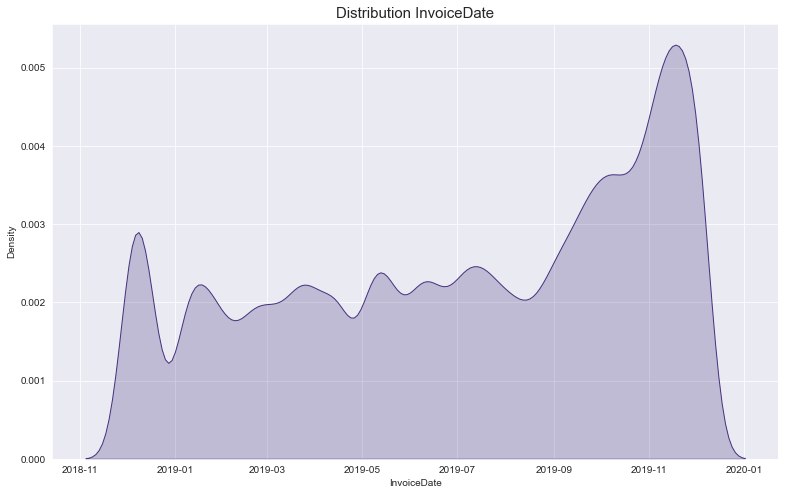

In [32]:
show_plot(data, 'InvoiceDate','kde')

In [33]:
(data.groupby('CustomerID').agg({'StockCode': 'count', 'Quantity' :'sum'})
                          .rename({'StockCode': 'count', 'Quantity' :'sum'})
                          .sort_values(by = 'Quantity', ascending=False))

StockCode  Quantity
CustomerID                     
0           130402     403460  
14646       2085       196719  
12415       778        77242   
14911       5898       77155   
17450       350        69009   
...          ...         ...   
16252       21        -158     
16742       4         -189     
14213       5         -244     
15823       17        -283     
16546       31        -303     

[4373 rows x 2 columns]

In [34]:
#look at the CustomerID who bought the most items
data[data['CustomerID'] == 14646]

InvoiceNo StockCode                       Description  Quantity  \
37952   539491    21981     PACK OF 12 WOODLAND TISSUES       12         
37953   539491    21986     PACK OF 12 PINK POLKADOT TISSUES  12         
37954   539491    22720     SET OF 3 CAKE TINS PANTRY DESIGN  2          
37955   539491    21931     JUMBO STORAGE BAG SUKI            1          
37956   539491    22613     PACK OF 20 SPACEBOY NAPKINS       2          
...        ...      ...                             ...      ..          
534958  581176    22908     PACK OF 20 NAPKINS RED APPLES     96         
534959  581176    22907     PACK OF 20 NAPKINS PANTRY DESIGN  96         
534960  581176    22029     SPACEBOY BIRTHDAY CARD            72         
534961  581176    22712     CARD DOLLY GIRL                   72         
537783  581338    23344     JUMBO BAG 50'S CHRISTMAS          140        

               InvoiceDate  UnitPrice  CustomerID  
37952  2018-12-18 10:09:00 0.290       14646       
37953  2018-12-18 10:09:00 0.290       14646       
37954  2018-12-18 10:09:00 4.950       14646       
37955  2018-12-18 10:09:00 1.950       14646       
37956  2018-12-18 10:09:00 0.850       14646       
...                    ...   ...         ...       
534958 2019-12-05 15:19:00 0.720       14646       
534959 2019-12-05 15:19:00 0.720       14646       
534960 2019-12-05 15:19:00 0.360       14646       
534961 2019-12-05 15:19:00 0.360       14646       
537783 2019-12-06 12:12:00 1.790       14646       

[2085 rows x 7 columns]

### Negative quantity

Let's assume that all orders that have been canceled have the letter C at the beginning of the stock code in our data. Let's create a separate dataset with these values.

In [35]:
#for future research we will keep all returned items
return_items = data[data['InvoiceNo'].str.contains('C')]
return_items.sort_values(by="Quantity")

InvoiceNo StockCode                          Description  Quantity  \
540422  C581484   23843     PAPER CRAFT , LITTLE BIRDIE         -80995      
61624   C541433   23166     MEDIUM CERAMIC TOP STORAGE JAR      -74215      
4287    C536757   84347     ROTATING SILVER ANGELS T-LIGHT HLDR -9360       
160145  C550456   21108     FAIRY CAKE FLANNEL ASSORTED COLOUR  -3114       
160144  C550456   21175     GIN + TONIC DIET METAL SIGN         -2000       
...         ...     ...                             ...           ...       
236714  C557773   22854     CREAM SWEETHEART EGG HOLDER         -1          
235962  C557666   22846     BREAD BIN DINER STYLE RED           -1          
235961  C557665   22843     BISCUIT TIN VINTAGE GREEN           -1          
237605  C557876   23245     SET OF 3 REGENCY CAKE TINS          -1          
256171  C559461   21427     SKULLS STORAGE BOX SMALL            -1          

               InvoiceDate  UnitPrice  CustomerID  
540422 2019-12-07 09:27:00 2.080       16446       
61624  2019-01-16 10:17:00 1.040       12346       
4287   2018-11-30 14:23:00 0.030       15838       
160145 2019-04-16 13:08:00 2.100       15749       
160144 2019-04-16 13:08:00 1.850       15749       
...                    ...   ...         ...       
236714 2019-06-20 14:55:00 4.950       15059       
235962 2019-06-19 18:03:00 16.950      12947       
235961 2019-06-19 18:02:00 6.750       13384       
237605 2019-06-21 13:10:00 4.950       18223       
256171 2019-07-06 13:04:00 2.100       14680       

[9251 rows x 7 columns]

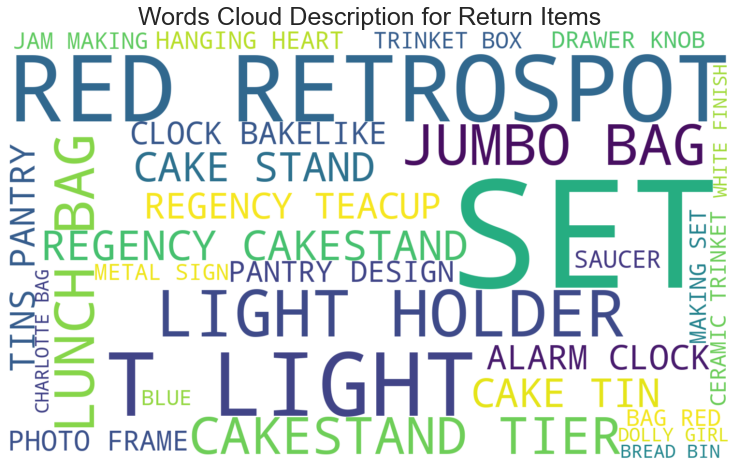

In [36]:
return_words =return_items['Description'].dropna().to_string(index=False)
    
vizualization(return_words, "Words Cloud Description for Return Items") 


In [37]:
RETRO_SET= return_items[return_items['Description'].str.contains('RETROSPOT|SET|RED', na=False, regex=True)]
RETRO_SET

InvoiceNo StockCode                          Description  Quantity  \
154     C536383   35004C    SET OF 3 COLOURED  FLYING DUCKS     -1          
238     C536391   21980     PACK OF 12 RED RETROSPOT TISSUES    -24         
939     C536506   22960     JAM MAKING SET WITH JARS            -6          
1441    C536543   22632     HAND WARMER RED RETROSPOT           -1          
1975    C536548   20914     SET/5 RED RETROSPOT LID GLASS BOWLS -1          
...         ...     ...                                     ... ..          
540087  C581466   22838     3 TIER CAKE TIN RED AND CREAM       -1          
540088  C581466   22720     SET OF 3 CAKE TINS PANTRY DESIGN    -2          
540089  C581466   21216     SET 3 RETROSPOT TEA,COFFEE,SUGAR    -1          
540090  C581466   21535     RED RETROSPOT SMALL MILK JUG        -2          
541717  C581569   20979     36 PENCILS TUBE RED RETROSPOT       -5          

               InvoiceDate  UnitPrice  CustomerID  
154    2018-11-29 09:49:00 4.650       15311       
238    2018-11-29 10:24:00 0.290       17548       
939    2018-11-29 12:38:00 4.250       17897       
1441   2018-11-29 14:30:00 2.100       17841       
1975   2018-11-29 14:33:00 2.950       12472       
...                    ...   ...         ...       
540087 2019-12-06 19:20:00 14.950      13883       
540088 2019-12-06 19:20:00 4.950       13883       
540089 2019-12-06 19:20:00 4.950       13883       
540090 2019-12-06 19:20:00 2.550       13883       
541717 2019-12-07 11:58:00 1.250       17315       

[1990 rows x 7 columns]

The amount of data with the letter C in the code and the data that has a negative amount are the same.
Let's assume that the goods were purchased and returned on the same day or with a small time difference.
How can we check this?
Create a database with returned items that have a negative quantity value, and then create another item data with non-negative values. The returned values must match in the following columns - descriptions, unit price, CustomerID, quantity (we will convert the quantity data in the returns dataset to an absolute value).

Next, we will connect two datasets by these columns and find intersecting values, which we will then remove from the general dataset.

In [38]:
cancel_Orders = data[data['Quantity'] < 0]
display(cancel_Orders.head())
cancel_Orders.info()

InvoiceNo StockCode                      Description  Quantity  \
141  C536379   D         Discount                        -1          
154  C536383   35004C    SET OF 3 COLOURED  FLYING DUCKS -1          
235  C536391   22556     PLASTERS IN TIN CIRCUS PARADE   -12         
236  C536391   21984     PACK OF 12 PINK PAISLEY TISSUES -24         
237  C536391   21983     PACK OF 12 BLUE PAISLEY TISSUES -24         

            InvoiceDate  UnitPrice  CustomerID  
141 2018-11-29 09:41:00 27.500      14527       
154 2018-11-29 09:49:00 4.650       15311       
235 2018-11-29 10:24:00 1.650       17548       
236 2018-11-29 10:24:00 0.290       17548       
237 2018-11-29 10:24:00 0.290       17548

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9251 entries, 141 to 541717
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    9251 non-null   object        
 1   StockCode    9251 non-null   object        
 2   Description  9251 non-null   object        
 3   Quantity     9251 non-null   int64         
 4   InvoiceDate  9251 non-null   datetime64[ns]
 5   UnitPrice    9251 non-null   float64       
 6   CustomerID   9251 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 578.2+ KB


In [39]:
cancel_Orders['UnitPrice'].sum()

449325.05

In [40]:
cancel_Orders['Quantity'].sum()

-275560

In [41]:
not_Negative = data[data['Quantity']>0].reset_index()
not_Negative.sample(5)

index InvoiceNo StockCode                        Description  \
211152  220010  556111    22712     CARD DOLLY GIRL                     
127979  133975  547811    51014L    FEATHER PEN,LIGHT PINK              
238077  247864  558777    21417     COCKLE SHELL DISH                   
281576  292607  562558    23154     SET OF 4 JAM JAR MAGNETS            
173794  181503  552491    85184C    S/4 VALENTINE DECOUPAGE HEART BOX   

        Quantity         InvoiceDate  UnitPrice  CustomerID  
211152  12       2019-06-07 09:16:00 0.420       13004       
127979  2        2019-03-23 14:01:00 0.850       17368       
238077  1        2019-07-02 10:23:00 4.130       0           
281576  4        2019-08-03 16:43:00 2.080       13451       
173794  6        2019-05-07 16:01:00 2.950       17033

In [42]:
cancel_Orders  = cancel_Orders.reset_index()
cancel_Orders['Quantity'] = abs(cancel_Orders['Quantity'])
cancel_Orders

index InvoiceNo StockCode                       Description  Quantity  \
0     141     C536379   D         Discount                          1          
1     154     C536383   35004C    SET OF 3 COLOURED  FLYING DUCKS   1          
2     235     C536391   22556     PLASTERS IN TIN CIRCUS PARADE     12         
3     236     C536391   21984     PACK OF 12 PINK PAISLEY TISSUES   24         
4     237     C536391   21983     PACK OF 12 BLUE PAISLEY TISSUES   24         
...   ...         ...     ...                                 ...   ..         
9246  540449  C581490   23144     ZINC T-LIGHT HOLDER STARS SMALL   11         
9247  541541  C581499   M         Manual                            1          
9248  541715  C581568   21258     VICTORIAN SEWING BOX LARGE        5          
9249  541716  C581569   84978     HANGING HEART JAR T-LIGHT HOLDER  1          
9250  541717  C581569   20979     36 PENCILS TUBE RED RETROSPOT     5          

             InvoiceDate  UnitPrice  CustomerID  
0    2018-11-29 09:41:00 27.500      14527       
1    2018-11-29 09:49:00 4.650       15311       
2    2018-11-29 10:24:00 1.650       17548       
3    2018-11-29 10:24:00 0.290       17548       
4    2018-11-29 10:24:00 0.290       17548       
...                  ...   ...         ...       
9246 2019-12-07 09:57:00 0.830       14397       
9247 2019-12-07 10:28:00 224.690     15498       
9248 2019-12-07 11:57:00 10.950      15311       
9249 2019-12-07 11:58:00 1.250       17315       
9250 2019-12-07 11:58:00 1.250       17315       

[9251 rows x 8 columns]

In [43]:
#our columns of purchased and returned goods must match on these columns
check_columns = ['CustomerID','UnitPrice','Quantity','Description']

In [44]:
match_data = not_Negative.merge(cancel_Orders, on = check_columns).sort_values("CustomerID")
match_data

index_x InvoiceNo_x StockCode_x                          Description  \
1721  89319    543899      21121       SET/10 RED POLKADOT PARTY CANDLES     
1105  164353   550638      22960       JAM MAKING SET WITH JARS              
1104  162327   550500      22960       JAM MAKING SET WITH JARS              
1103  162216   550499      22960       JAM MAKING SET WITH JARS              
1102  160854   550470      22960       JAM MAKING SET WITH JARS              
...      ...      ...        ...                            ...              
5598  453558   575485      22851       SET 20 NAPKINS FAIRY CAKES DESIGN     
5597  453557   575485      84509A      SET OF 4 ENGLISH ROSE PLACEMATS       
5607  453567   575485      22423       REGENCY CAKESTAND 3 TIER              
5600  453560   575485      23243       SET OF TEA COFFEE SUGAR TINS PANTRY   
5599  453559   575485      22989       SET 2 PANTRY DESIGN TEA TOWELS        

      Quantity       InvoiceDate_x  UnitPrice  CustomerID  index_y  \
1721  24       2019-02-12 12:11:00 1.250       0           235950    
1105  1        2019-04-17 15:44:00 8.290       0           242607    
1104  1        2019-04-16 15:26:00 8.290       0           242607    
1103  1        2019-04-16 15:16:00 8.290       0           242607    
1102  1        2019-04-16 13:49:00 8.290       0           242607    
...  ..                        ...   ...      ..              ...    
5598  12       2019-11-07 17:03:00 0.850       18274       488520    
5597  4        2019-11-07 17:03:00 3.750       18274       488516    
5607  1        2019-11-07 17:03:00 12.750      18274       488522    
5600  4        2019-11-07 17:03:00 4.950       18274       488518    
5599  6        2019-11-07 17:03:00 3.250       18274       488519    

     InvoiceNo_y StockCode_y       InvoiceDate_y  
1721  C557663     21121      2019-06-19 17:59:00  
1105  C558364     22960      2019-06-26 15:20:00  
1104  C558364     22960      2019-06-26 15:20:00  
1103  C558364     22960      2019-06-26 15:20:00  
1102  C558364     22960      2019-06-26 15:20:00  
...       ...       ...                      ...  
5598  C577832     22851      2019-11-20 10:18:00  
5597  C577832     84509A     2019-11-20 10:18:00  
5607  C577832     22423      2019-11-20 10:18:00  
5600  C577832     23243      2019-11-20 10:18:00  
5599  C577832     22989      2019-11-20 10:18:00  

[5839 rows x 12 columns]

In [45]:
# create a new list of values from columns 'index_x' and 'index_y'
drop_List = set(np.column_stack((match_data.index_x.values, match_data.index_y.values)).ravel())

#drop_List

In [46]:
#clean our data
data= data.query("index not in @drop_List")

So, we removed all values that could be returns or exactly the same in the return, which allowed us to exclude these data for further work.

Let's check how many negative values we still have left and study them.

In [47]:
data[data['Quantity'] < 0]

InvoiceNo StockCode                       Description  Quantity  \
141     C536379   D         Discount                         -1          
154     C536383   35004C    SET OF 3 COLOURED  FLYING DUCKS  -1          
235     C536391   22556     PLASTERS IN TIN CIRCUS PARADE    -12         
236     C536391   21984     PACK OF 12 PINK PAISLEY TISSUES  -24         
237     C536391   21983     PACK OF 12 BLUE PAISLEY TISSUES  -24         
...         ...     ...                                 ...   ..         
540449  C581490   23144     ZINC T-LIGHT HOLDER STARS SMALL  -11         
541541  C581499   M         Manual                           -1          
541715  C581568   21258     VICTORIAN SEWING BOX LARGE       -5          
541716  C581569   84978     HANGING HEART JAR T-LIGHT HOLDER -1          
541717  C581569   20979     36 PENCILS TUBE RED RETROSPOT    -5          

               InvoiceDate  UnitPrice  CustomerID  
141    2018-11-29 09:41:00 27.500      14527       
154    2018-11-29 09:49:00 4.650       15311       
235    2018-11-29 10:24:00 1.650       17548       
236    2018-11-29 10:24:00 0.290       17548       
237    2018-11-29 10:24:00 0.290       17548       
...                    ...   ...         ...       
540449 2019-12-07 09:57:00 0.830       14397       
541541 2019-12-07 10:28:00 224.690     15498       
541715 2019-12-07 11:57:00 10.950      15311       
541716 2019-12-07 11:58:00 1.250       17315       
541717 2019-12-07 11:58:00 1.250       17315       

[6010 rows x 7 columns]

In [48]:
len(data.query("Quantity < 0"))/len(cancel_Orders)*100

64.96594962706735

In [49]:
data.groupby('Description').mean()['UnitPrice'].nlargest(10)

Description
AMAZON FEE                           7,171.696
PICNIC BASKET WICKER 60 PIECES       649.500  
CRUK Commission                      495.839  
DOTCOM POSTAGE                       293.162  
Manual                               283.977  
Bank Charges                         202.855  
REGENCY MIRROR WITH SHUTTERS         156.429  
RUSTIC  SEVENTEEN DRAWER SIDEBOARD   154.600  
VINTAGE BLUE KITCHEN CABINET         149.250  
VINTAGE RED KITCHEN CABINET          138.903  
Name: UnitPrice, dtype: float64

In [50]:
data[data['Quantity'] == -720]

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
108088  C545478   D         Discount   -720      2019-03-01 11:08:00   

        UnitPrice  CustomerID  
108088 0.010       16422

In [51]:
AMAZONFEE=data[data['Description'] == "AMAZON FEE"]
AMAZONFEE.UnitPrice.sum()

207979.17

In [52]:
data[data['Description'] == "Dotcomgiftshop Gift Voucher £50.00"]

InvoiceNo     StockCode                         Description  Quantity  \
42057   539958    gift_0001_50  Dotcomgiftshop Gift Voucher £50.00  1          
178556  552232    gift_0001_50  Dotcomgiftshop Gift Voucher £50.00  1          
239744  558066    gift_0001_50  Dotcomgiftshop Gift Voucher £50.00  1          
245516  558614    gift_0001_50  Dotcomgiftshop Gift Voucher £50.00  1          

               InvoiceDate  UnitPrice  CustomerID  
42057  2018-12-21 13:26:00 42.550      0           
178556 2019-05-04 15:54:00 41.670      0           
239744 2019-06-22 15:45:00 41.670      0           
245516 2019-06-28 15:56:00 41.670      0

In [53]:
# data with gift vauchers for future study
gift_data = data[data['StockCode'].str.contains('gift', na=False, regex=True)]
gift_data.describe()

Quantity  UnitPrice  CustomerID
count 31.000    31.000     31.000     
mean  1.065     21.316     0.000      
std   0.250     11.231     0.000      
min   1.000     8.330      0.000      
25%   1.000     12.500     0.000      
50%   1.000     16.670     0.000      
75%   1.000     25.265     0.000      
max   2.000     42.550     0.000

In [54]:
strange_descr = (['printing smudges/thrown away',
                 'damages', 'check', '?', 'Discount',
                 'amazon', 'Manual', 'Adjust bad debt',
                 'POSTAGE', 'CRUK Commission', 'AMAZONFEE',
                 'discount', 'dotcom postage', 'bank charges ',
                 'samples', 'carriage', 'amazon fee',
                 'dotcom postage', 'bank charges', 'missing',
                 'check', 'broken', '?missing', 'damages/samples',
                 'test',  'missing?', 'wet', 'lost', 'cracked',
                 'wrong code', 'sale error', 'broken', 'found',
                 'discount', 'postage', 'manual',
                 'SAMPLES', 'CARRIAGE', 'DOT', 'PADS', 'DOTCOM POSTAGE'])

data = data.query("Description not in @strange_descr")

display(data.info())
display(data.Quantity.describe())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 520725 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    520725 non-null  object        
 1   StockCode    520725 non-null  object        
 2   Description  520725 non-null  object        
 3   Quantity     520725 non-null  int64         
 4   InvoiceDate  520725 non-null  datetime64[ns]
 5   UnitPrice    520725 non-null  float64       
 6   CustomerID   520725 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 31.8+ MB


None

count   520,725.000
mean    10.078     
std     42.695     
min     -9,360.000 
25%     1.000      
50%     3.000      
75%     10.000     
max     12,540.000 
Name: Quantity, dtype: float64

In [55]:
data[data['StockCode'] == "PADS"]

InvoiceNo StockCode                 Description  Quantity  \
157195  550193    PADS      PADS TO MATCH ALL CUSHIONS  1          
279045  561226    PADS      PADS TO MATCH ALL CUSHIONS  1          
358655  568158    PADS      PADS TO MATCH ALL CUSHIONS  1          
359871  568200    PADS      PADS TO MATCH ALL CUSHIONS  1          

               InvoiceDate  UnitPrice  CustomerID  
157195 2019-04-13 09:27:00 0.001       13952       
279045 2019-07-24 10:13:00 0.001       15618       
358655 2019-09-23 12:22:00 0.000       16133       
359871 2019-09-23 14:58:00 0.001       16198

In [56]:
data[data['UnitPrice'] == 0]

InvoiceNo StockCode                          Description  Quantity  \
9302    537197    22841     ROUND CAKE TIN VINTAGE GREEN         1          
33576   539263    22580     ADVENT CALENDAR GINGHAM SACK         4          
40089   539722    22423     REGENCY CAKESTAND 3 TIER             10         
47068   540372    22090     PAPER BUNTING RETROSPOT              24         
47070   540372    22553     PLASTERS IN TIN SKULLS               24         
56674   541109    22168     ORGANISER WOOD ANTIQUE WHITE         1          
86789   543599    84535B    FAIRY CAKES NOTEBOOK A6 SIZE         16         
130188  547417    22062     CERAMIC BOWL WITH LOVE HEART DESIGN  36         
139453  548318    22055     MINI CAKE STAND  HANGING STRAWBERY   5          
145208  548871    22162     HEART GARLAND RUSTIC PADDED          2          
157042  550188    22636     CHILDS BREAKFAST SET CIRCUS PARADE   1          
187613  553000    47566     PARTY BUNTING                        4          
198383  554037    22619     SET OF 6 SOLDIER SKITTLES            80         
279324  561284    22167     OVAL WALL MIRROR DIAMANTE            1          
282912  561669    22960     JAM MAKING SET WITH JARS             11         
298054  562973    23157     SET OF 6 NATIVITY MAGNETS            240        
314745  564651    23270     SET OF 2 CERAMIC PAINTED HEARTS      96         
314746  564651    23268     SET OF 2 CERAMIC CHRISTMAS REINDEER  192        
314747  564651    22955     36 FOIL STAR CAKE CASES              144        
314748  564651    21786     POLKADOT RAIN HAT                    144        
358655  568158    PADS      PADS TO MATCH ALL CUSHIONS           1          
379913  569716    22778     GLASS CLOCHE SMALL                   2          
420404  572893    21208     PASTEL COLOUR HONEYCOMB FAN          5          
436428  574138    23234     BISCUIT TIN VINTAGE CHRISTMAS        216        
436597  574175    22065     CHRISTMAS PUDDING TRINKET POT        12         
439361  574469    22385     JUMBO BAG SPACEBOY DESIGN            12         
446125  574879    22625     RED KITCHEN SCALES                   2          
446793  574920    22899     CHILDREN'S APRON DOLLY GIRL          1          
446794  574920    23480     MINI LIGHTS WOODLAND MUSHROOMS       1          
454463  575579    22437     SET OF 9 BLACK SKULL BALLOONS        20         
454464  575579    22089     PAPER BUNTING VINTAGE PAISLEY        24         
479079  577129    22464     HANGING METAL HEART LANTERN          4          
480649  577314    23407     SET OF 2 TRAYS HOME SWEET HOME       2          
502122  578841    84826     ASSTD DESIGN 3D PAPER STICKERS       12540      

               InvoiceDate  UnitPrice  CustomerID  
9302   2018-12-03 14:02:00 0.000       12647       
33576  2018-12-14 14:36:00 0.000       16560       
40089  2018-12-19 13:45:00 0.000       14911       
47068  2019-01-04 16:41:00 0.000       13081       
47070  2019-01-04 16:41:00 0.000       13081       
56674  2019-01-11 15:10:00 0.000       15107       
86789  2019-02-08 13:08:00 0.000       17560       
130188 2019-03-21 10:25:00 0.000       13239       
139453 2019-03-28 12:45:00 0.000       13113       
145208 2019-04-02 14:42:00 0.000       14410       
157042 2019-04-12 18:57:00 0.000       12457       
187613 2019-05-10 15:21:00 0.000       17667       
198383 2019-05-18 14:13:00 0.000       12415       
279324 2019-07-24 12:24:00 0.000       16818       
282912 2019-07-26 17:09:00 0.000       12507       
298054 2019-08-09 11:42:00 0.000       14911       
314745 2019-08-24 14:19:00 0.000       14646       
314746 2019-08-24 14:19:00 0.000       14646       
314747 2019-08-24 14:19:00 0.000       14646       
314748 2019-08-24 14:19:00 0.000       14646       
358655 2019-09-23 12:22:00 0.000       16133       
379913 2019-10-04 08:17:00 0.000       15804       
420404 2019-10-24 14:36:00 0.000       18059       
436428 2019-11-01 11:26:00 0.000       12415       
436597 2019

In [57]:
data[data['InvoiceNo'] == "578841"]

InvoiceNo StockCode                     Description  Quantity  \
502122  578841    84826     ASSTD DESIGN 3D PAPER STICKERS  12540      

               InvoiceDate  UnitPrice  CustomerID  
502122 2019-11-23 15:57:00 0.000       13256

In [58]:
data = data[data['UnitPrice'] > 0]

Let's check how our data is distributed throughout the year. And we will create a new data that would include a full year for a more correct analysis.

In [59]:
display(data['InvoiceDate'].min())
display(data['InvoiceDate'].max())

Timestamp('2018-11-29 08:26:00')

Timestamp('2019-12-07 12:50:00')

In [60]:
data= data[(data['InvoiceDate'] >= "2018-12-01")& (data['InvoiceDate'] < "2019-12-01")].reset_index(drop=True)
data.head()

InvoiceNo StockCode                         Description  Quantity  \
0  536847    22155     STAR DECORATION RUSTIC              48         
1  536847    21807     WHITE CHRISTMAS STAR DECORATION     36         
2  536847    22161     HEART DECORATION RUSTIC HANGING     24         
3  536847    22065     CHRISTMAS PUDDING TRINKET POT       24         
4  536847    20956     PORCELAIN T-LIGHT HOLDERS ASSORTED  12         

          InvoiceDate  UnitPrice  CustomerID  
0 2018-12-01 09:31:00 0.420       17135       
1 2018-12-01 09:31:00 0.420       17135       
2 2018-12-01 09:31:00 0.650       17135       
3 2018-12-01 09:31:00 1.450       17135       
4 2018-12-01 09:31:00 1.250       17135

In [61]:
#check data after correction

display(data['InvoiceDate'].min())
display(data['InvoiceDate'].max())

Timestamp('2018-12-01 09:31:00')

Timestamp('2019-11-30 17:13:00')

In [62]:
#Let's check how much data we have left with a quantity less than 0
data[data['Quantity'] <= 0]

InvoiceNo StockCode                        Description  Quantity  \
15      C536850   22942     CHRISTMAS LIGHTS 10 SANTAS        -48         
16      C536850   22689     DOORMAT MERRY CHRISTMAS RED       -50         
17      C536850   22591     CARDHOLDER GINGHAM CHRISTMAS TREE -50         
18      C536850   22580     ADVENT CALENDAR GINGHAM SACK      -48         
19      C536850   22186     RED STAR CARD HOLDER              -48         
...         ...     ...                      ...               ..         
495341  C580313   37450     CERAMIC CAKE BOWL + HANGING CAKES -1          
495342  C580313   22649     STRAWBERRY FAIRY CAKE TEAPOT      -3          
495343  C580313   22419     LIPSTICK PEN RED                  -6          
495344  C580313   22303     COFFEE MUG APPLES DESIGN          -2          
495345  C580313   21232     STRAWBERRY CERAMIC TRINKET POT    -3          

               InvoiceDate  UnitPrice  CustomerID  
15     2018-12-01 09:47:00 7.650       14213       
16     2018-12-01 09:47:00 6.750       14213       
17     2018-12-01 09:47:00 2.550       14213       
18     2018-12-01 09:47:00 4.950       14213       
19     2018-12-01 09:47:00 2.550       14213       
...                    ...   ...         ...       
495341 2019-11-30 15:10:00 2.950       12668       
495342 2019-11-30 15:10:00 4.950       12668       
495343 2019-11-30 15:10:00 0.420       12668       
495344 2019-11-30 15:10:00 2.550       12668       
495345 2019-11-30 15:10:00 1.250       12668       

[5340 rows x 7 columns]

In [63]:
data[data['CustomerID'] == 14213]

InvoiceNo StockCode                        Description  Quantity  \
15  C536850   22942     CHRISTMAS LIGHTS 10 SANTAS        -48         
16  C536850   22689     DOORMAT MERRY CHRISTMAS RED       -50         
17  C536850   22591     CARDHOLDER GINGHAM CHRISTMAS TREE -50         
18  C536850   22580     ADVENT CALENDAR GINGHAM SACK      -48         
19  C536850   22186     RED STAR CARD HOLDER              -48         

           InvoiceDate  UnitPrice  CustomerID  
15 2018-12-01 09:47:00 7.650       14213       
16 2018-12-01 09:47:00 6.750       14213       
17 2018-12-01 09:47:00 2.550       14213       
18 2018-12-01 09:47:00 4.950       14213       
19 2018-12-01 09:47:00 2.550       14213

It looks like a return of some order for previous days. Let's see how many return orders we have left relative to all the data.

In [64]:
#data with canceled orders after cleaning
C_data = data[data['InvoiceNo'].str.contains('C')]

# What is the percentage of returns on total revenue?
print('What is the percentage of returns on total revenue?', round(abs(C_data['UnitPrice']*C_data['Quantity']).sum()/(data['UnitPrice']*data['Quantity']).sum()*100, 2))

#what percentage of the number of lines with returns is from the whole date
print('What percentage of the number of rows with returns is from the whole date?', round(len(C_data)/len(data)*100, 2))

What is the percentage of returns on total revenue? 2.9
What percentage of the number of rows with returns is from the whole date? 1.08


Since this data does not make up a large percentage of our data, we can safely remove it from our dataset.

In [65]:
data = data[~data['InvoiceNo'].str.contains('C')]
data

InvoiceNo StockCode                         Description  Quantity  \
0       536847    22155     STAR DECORATION RUSTIC              48         
1       536847    21807     WHITE CHRISTMAS STAR DECORATION     36         
2       536847    22161     HEART DECORATION RUSTIC HANGING     24         
3       536847    22065     CHRISTMAS PUDDING TRINKET POT       24         
4       536847    20956     PORCELAIN T-LIGHT HOLDERS ASSORTED  12         
...        ...      ...                                    ...  ..         
496338  580375    23013     GLASS APOTHECARY BOTTLE TONIC       24         
496339  580375    23012     GLASS APOTHECARY BOTTLE PERFUME     12         
496340  580375    23579     SNACK TRAY I LOVE LONDON            16         
496341  580375    23418     LAVENDER TOILETTE BOTTLE            12         
496342  580375    23338     EGG FRYING PAN RED                  12         

               InvoiceDate  UnitPrice  CustomerID  
0      2018-12-01 09:31:00 0.420       17135       
1      2018-12-01 09:31:00 0.420       17135       
2      2018-12-01 09:31:00 0.650       17135       
3      2018-12-01 09:31:00 1.450       17135       
4      2018-12-01 09:31:00 1.250       17135       
...                    ...   ...         ...       
496338 2019-11-30 17:13:00 3.450       14031       
496339 2019-11-30 17:13:00 3.450       14031       
496340 2019-11-30 17:13:00 1.950       14031       
496341 2019-11-30 17:13:00 2.080       14031       
496342 2019-11-30 17:13:00 2.080       14031       

[491003 rows x 7 columns]

In [66]:
data.describe()

Quantity   UnitPrice  CustomerID
count 491,003.000 491,003.000 491,003.000
mean  10.273      3.251       11,508.776 
std   36.649      4.298       6,759.449  
min   1.000       0.001       0.000      
25%   1.000       1.250       12,370.000 
50%   4.000       2.080       14,388.000 
75%   12.000      4.130       16,261.000 
max   4,800.000   649.500     18,287.000

In [67]:
for i in data.columns:
    print(i, '- len unique:', len(data[i].unique()))

InvoiceNo - len unique: 18694
StockCode - len unique: 3899
Description - len unique: 3989
Quantity - len unique: 351
InvoiceDate - len unique: 17353
UnitPrice - len unique: 488
CustomerID - len unique: 4258


In [68]:
len(data)/541909*100

90.60617188494747

In [69]:
clean_data = data.copy()

**Conclusions**

In the process of studying the data, we dealt with duplicated, lost and missing values, cleared the data from negative quantities and unit prices, which denoted the return of goods.
We changed the value type to CustomID and made it integer. We assumed that the missing values were data of some other type and change it  to null value for further investigation.
Reduced data by time period and now they represent the full year from December 1, 2018 to December 1, 2019.
During the preprocessing and preparation process, about 10% of the data was removed, but now we have a prepared dataset for further study.

### New columns - Revenue, Data

In [70]:

#extracting dates
data['Date'] = data['InvoiceDate'].dt.date
#changing 'date' column data type
data['Date'] = data['Date'].astype('datetime64')
data['Quarter'] = data['InvoiceDate'].dt.quarter
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491003 entries, 0 to 496342
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    491003 non-null  object        
 1   StockCode    491003 non-null  object        
 2   Description  491003 non-null  object        
 3   Quantity     491003 non-null  int64         
 4   InvoiceDate  491003 non-null  datetime64[ns]
 5   UnitPrice    491003 non-null  float64       
 6   CustomerID   491003 non-null  int64         
 7   Date         491003 non-null  datetime64[ns]
 8   Quarter      491003 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(3)
memory usage: 37.5+ MB


In [71]:
data['Revenue'] = data['Quantity']*data['UnitPrice']
print('The total Revenue received by the store for the year -', round(data['Revenue'].sum(), 2))

The total Revenue received by the store for the year - 9256609.81


## Exploratory product description

In [72]:
product_group = (data.groupby('StockCode').agg({'Quantity': 'sum', 'UnitPrice' :'mean', 'Revenue': 'sum'})
                          .sort_values(by = 'Revenue', ascending=False))
product_group

Quantity  UnitPrice     Revenue
StockCode                                 
22423      12229    13.949     151,462.020
47566      17769    5.779      96,474.850 
85123A     33529    3.119      93,651.870 
85099B     44999    2.494      87,995.860 
23084      27269    2.391      59,068.750 
...          ...      ...             ... 
84206B     5        0.190      0.950      
90084      1        0.850      0.850      
51014c     1        0.830      0.830      
84227      1        0.420      0.420      
PADS       3        0.001      0.003      

[3899 rows x 3 columns]

In [73]:
data[data['StockCode'] == "22423"]

InvoiceNo StockCode               Description  Quantity  \
52      536856    22423     REGENCY CAKESTAND 3 TIER  2          
192     536862    22423     REGENCY CAKESTAND 3 TIER  6          
625     536876    22423     REGENCY CAKESTAND 3 TIER  40         
1294    536947    22423     REGENCY CAKESTAND 3 TIER  3          
1316    536956    22423     REGENCY CAKESTAND 3 TIER  1          
...        ...      ...                          ... ..          
495004  580298    22423     REGENCY CAKESTAND 3 TIER  2          
495076  580304    22423     REGENCY CAKESTAND 3 TIER  4          
495335  580311    22423     REGENCY CAKESTAND 3 TIER  2          
495602  580362    22423     REGENCY CAKESTAND 3 TIER  1          
495852  580367    22423     REGENCY CAKESTAND 3 TIER  2          

               InvoiceDate  UnitPrice  CustomerID       Date  Quarter  Revenue  
52     2018-12-01 10:26:00 12.750      13370      2018-12-01  4       25.500    
192    2018-12-01 11:13:00 25.490      0          2018-12-01  4       152.940   
625    2018-12-01 11:36:00 12.720      0          2018-12-01  4       508.800   
1294   2018-12-01 12:29:00 12.750      13013      2018-12-01  4       38.250    
1316   2018-12-01 12:43:00 12.750      14210      2018-12-01  4       12.750    
...                    ...    ...        ...             ... ..          ...    
495004 2019-11-30 13:54:00 12.750      17086      2019-11-30  4       25.500    
495076 2019-11-30 14:25:00 12.750      18055      2019-11-30  4       51.000    
495335 2019-11-30 14:48:00 12.750      18245      2019-11-30  4       25.500    
495602 2019-11-30 16:30:00 12.750      13884      2019-11-30  4       12.750    
495852 2019-11-30 16:39:00 24.960      0          2019-11-30  4       49.920    

[1843 rows x 10 columns]

If we look at the grouped data above, we can say that most of our revenue came from sales - `REGENCY CAKESTAND 3 TIER`, which brought us **151,462** y.e.

In terms of quantity, the top sellers are `POPCORN HOLDER`**(51664 pcs)** and `WORLD WAR 2 GLIDERS ASSTD DESIGNS` **(50418 pcs)**

In [74]:
display(data['UnitPrice'].quantile([.95]))
display(data['Quantity'].quantile([.95]))
display(data['Revenue'].quantile([.95]))

0.950   9.950
Name: UnitPrice, dtype: float64

0.950   30.000
Name: Quantity, dtype: float64

0.950   57.500
Name: Revenue, dtype: float64

Let's look at the percentiles in our data, we can see that 95% of the transactions:

- products with unit price less than or equal to 9.95
- order consists of 30 items or less
- total cost per Order 57 y.e. or less

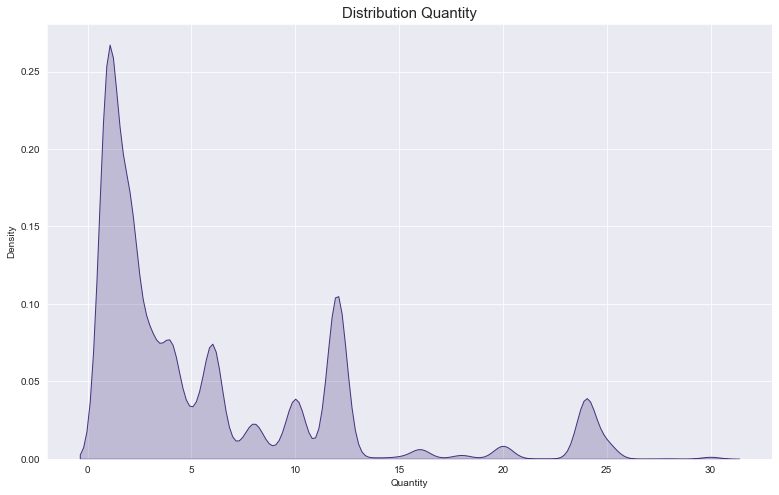

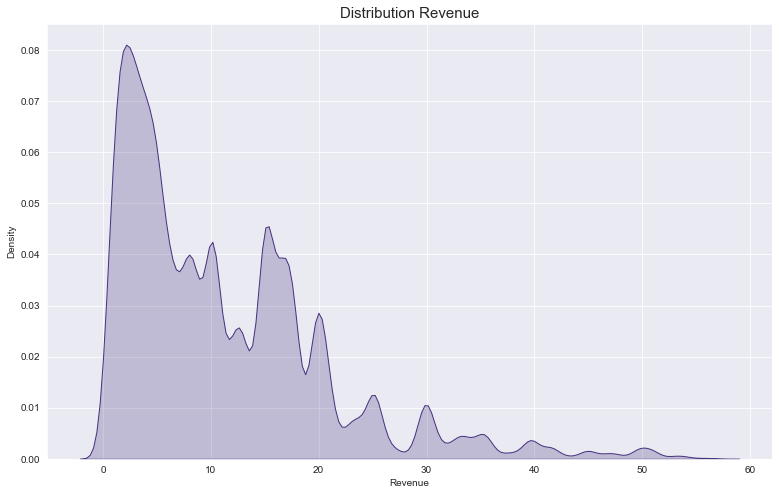

In [75]:
data_Noutliers=data[data['Quantity'] <= 30]
data_Noutliers = data_Noutliers[(data_Noutliers['Quantity'] >= 1) & (data_Noutliers['Revenue'] <= 57)]
categorical_columns = ['Quantity', 'Revenue' ]
 
for column in categorical_columns:
    show_plot(data_Noutliers, column, 'kde')

### Date distribution

In [76]:
difference = data.InvoiceDate.max() - data.InvoiceDate.min()
print('Data from %s to %s,\n difference in %s.' % (data.InvoiceDate.min(), data.InvoiceDate.max(), difference))

Data from 2018-12-01 09:31:00 to 2019-11-30 17:13:00,
 difference in 364 days 07:42:00.


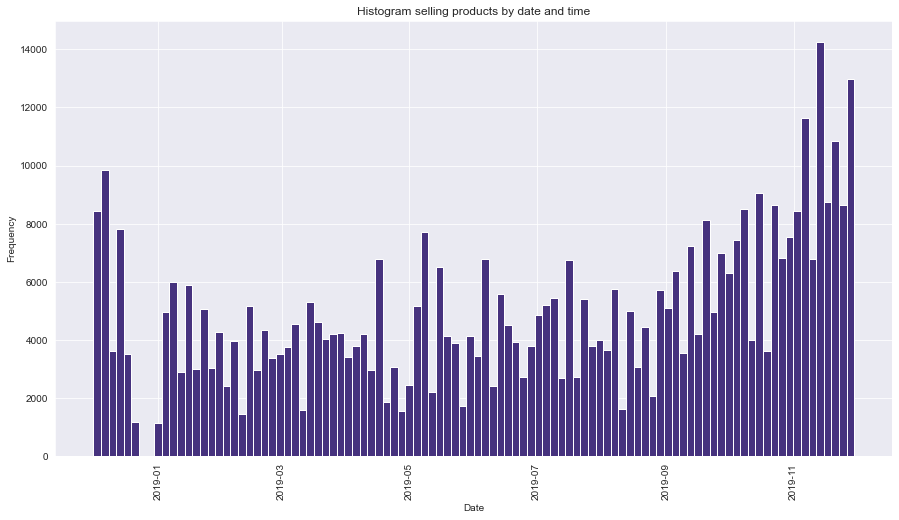

In [77]:
#visualizing 
plt.figure(figsize = (15, 8))
sns.set_style('darkgrid')
data['Date'].hist(bins=100).set_title('Histogram selling products by date and time')
plt.ylabel("Frequency")
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'DATE')

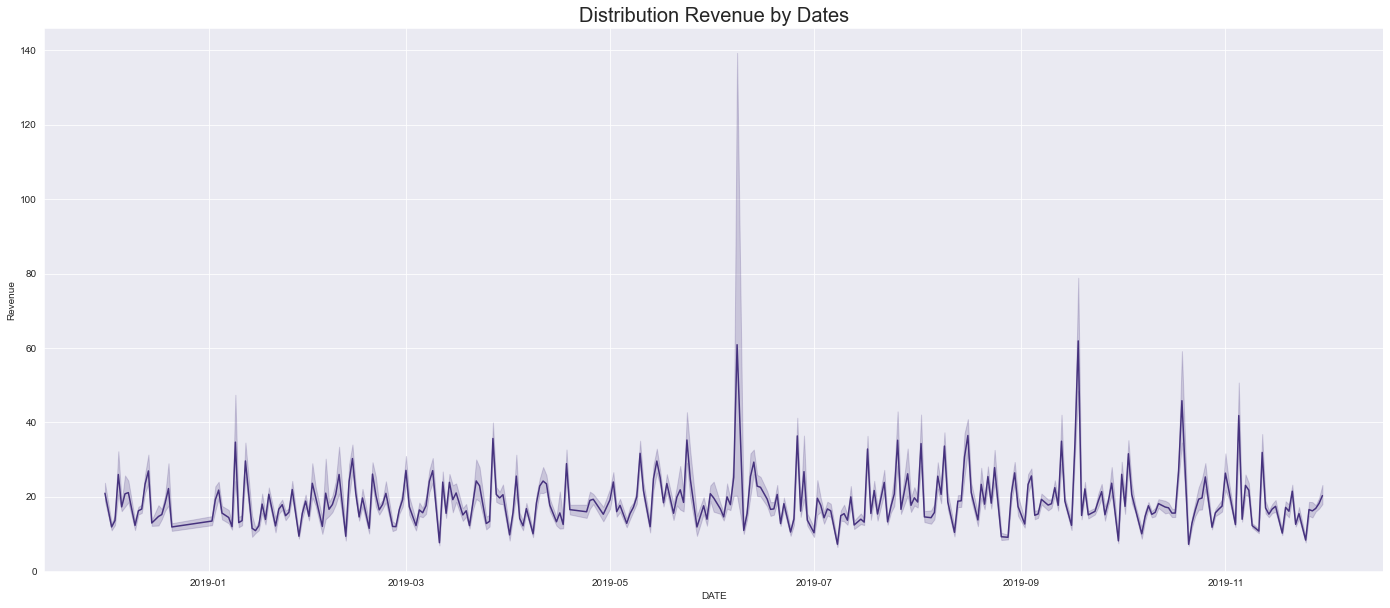

In [78]:
f, ax = plt.subplots(figsize=(24, 10))
plt.title('Distribution Revenue by Dates', fontdict={'size':20})
sns.lineplot(data = data, x='Date', y='Revenue')
plt.ylabel('Revenue')
#plt.xticks(rotation=90)
plt.xlabel('DATE')

In [79]:
data.groupby('InvoiceNo').agg(
    {'Quantity': 'sum', 'Revenue': 'sum', }).median()

Quantity   152.000
Revenue    301.010
dtype: float64

In [80]:
def display_max_min(data):
    display(data.iloc[np.where(data['UnitPrice'] == data['UnitPrice'].max())],
        data.iloc[np.where(data['Quantity'] == data['Quantity'].max())],
        data.iloc[np.where(data['Revenue'] == data['Revenue'].max())])

display_max_min(data)

InvoiceNo StockCode                     Description  Quantity  \
207676  556444    22502     PICNIC BASKET WICKER 60 PIECES  60         
207677  556446    22502     PICNIC BASKET WICKER 60 PIECES  1          

               InvoiceDate  UnitPrice  CustomerID       Date  Quarter  \
207676 2019-06-08 15:28:00 649.500     15098      2019-06-08  2         
207677 2019-06-08 15:33:00 649.500     15098      2019-06-08  2         

          Revenue  
207676 38,970.000  
207677 649.500

InvoiceNo StockCode                        Description  Quantity  \
399307  573008    84077     WORLD WAR 2 GLIDERS ASSTD DESIGNS  4800       

               InvoiceDate  UnitPrice  CustomerID       Date  Quarter  \
399307 2019-10-25 12:26:00 0.210       12901      2019-10-25  4         

         Revenue  
399307 1,008.000

InvoiceNo StockCode                     Description  Quantity  \
207676  556444    22502     PICNIC BASKET WICKER 60 PIECES  60         

               InvoiceDate  UnitPrice  CustomerID       Date  Quarter  \
207676 2019-06-08 15:28:00 649.500     15098      2019-06-08  2         

          Revenue  
207676 38,970.000

The largest unit price of item purchased and the highest payment for `CustomerID 15098` is `61 picnic basket wicker 60 pieces` worth 39,619.50.
Since the order was made in the summer, it is possible that this is a wholesale buyer who is may be the another shop owner or the organizer of some kind of summer event, market or weddings.

The most numerous order `world war 2 gliders asstd designs` bought 4800 pieces worth 1008.

### Holidays 2018

In [81]:
data_holidays=data[data['InvoiceDate'] <= '2019-01-02']
data_holidays

InvoiceNo StockCode                         Description  Quantity  \
0      536847    22155     STAR DECORATION RUSTIC              48         
1      536847    21807     WHITE CHRISTMAS STAR DECORATION     36         
2      536847    22161     HEART DECORATION RUSTIC HANGING     24         
3      536847    22065     CHRISTMAS PUDDING TRINKET POT       24         
4      536847    20956     PORCELAIN T-LIGHT HOLDERS ASSORTED  12         
...       ...      ...                                    ...  ..         
34799  539991    21618     4 WILDFLOWER BOTANICAL CANDLES      1          
34800  539991    72741     GRAND CHOCOLATECANDLE               4          
34801  539992    21470     FLOWER VINE RAFFIA FOOD COVER       1          
34802  539992    22258     FELT FARM ANIMAL RABBIT             1          
34803  539992    21155     RED RETROSPOT PEG BAG               1          

              InvoiceDate  UnitPrice  CustomerID       Date  Quarter  Revenue  
0     2018-12-01 09:31:00 0.420       17135      2018-12-01  4       20.160    
1     2018-12-01 09:31:00 0.420       17135      2018-12-01  4       15.120    
2     2018-12-01 09:31:00 0.650       17135      2018-12-01  4       15.600    
3     2018-12-01 09:31:00 1.450       17135      2018-12-01  4       34.800    
4     2018-12-01 09:31:00 1.250       17135      2018-12-01  4       15.000    
...                   ...   ...         ...             ... ..          ...    
34799 2018-12-21 16:49:00 1.250       0          2018-12-21  4       1.250     
34800 2018-12-21 16:49:00 1.450       0          2018-12-21  4       5.800     
34801 2018-12-21 17:41:00 3.750       0          2018-12-21  4       3.750     
34802 2018-12-21 17:41:00 1.250       0          2018-12-21  4       1.250     
34803 2018-12-21 17:41:00 2.100       0          2018-12-21  4       2.100     

[34357 rows x 10 columns]

In [82]:
print('The total Revenue received by the store for the DECEMBER -', round(data_holidays['Revenue'].sum(), 2))

The total Revenue received by the store for the DECEMBER - 609087.43


In [83]:
len(data_holidays['Description'].unique())

2671

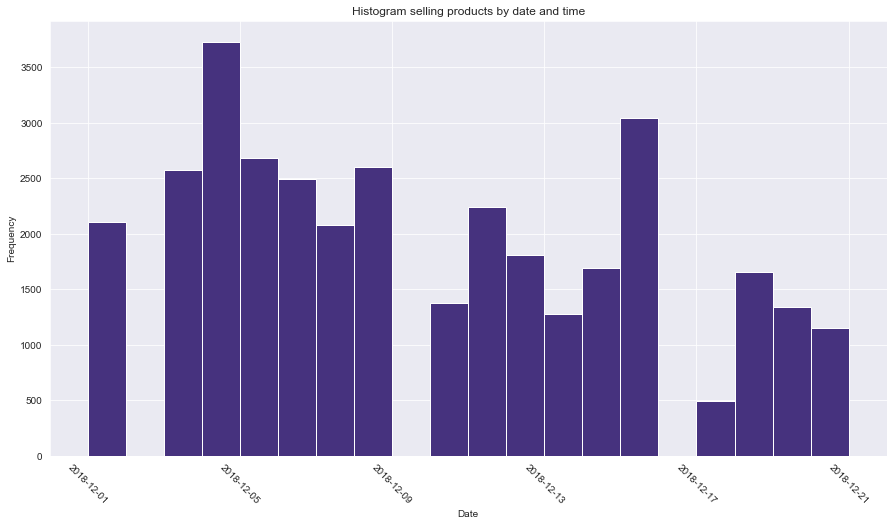

In [84]:
#visualizing 
plt.figure(figsize = (15, 8))
sns.set_style('darkgrid')
data_holidays['Date'].hist(bins=20).set_title('Histogram selling products by date and time')
plt.ylabel("Frequency")
plt.xlabel("Date")
plt.xticks(rotation=-45)
plt.show()

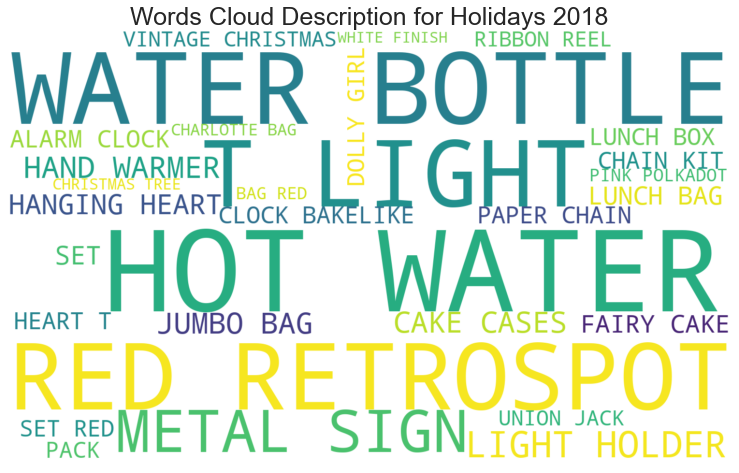

In [85]:
body_holidays_2018 =data_holidays['Description'].dropna().to_string(index=False)
    
vizualization(body_holidays_2018, "Words Cloud Description for Holidays 2018")    

In [86]:
data_holidays[data_holidays['Description'].str.contains('CHRISTMAS', na=False, regex=True)]

InvoiceNo StockCode                          Description  Quantity  \
1      536847    21807     WHITE CHRISTMAS STAR DECORATION      36         
3      536847    22065     CHRISTMAS PUDDING TRINKET POT        24         
9      536848    22910     PAPER CHAIN KIT VINTAGE CHRISTMAS    80         
46     536856    22941     CHRISTMAS LIGHTS 10 REINDEER         2          
47     536856    22943     CHRISTMAS LIGHTS 10 VINTAGE BAUBLES  6          
...       ...      ...                                     ... ..          
34504  539958    22945     CHRISTMAS METAL TAGS ASSORTED        1          
34506  539958    22952     60 CAKE CASES VINTAGE CHRISTMAS      1          
34516  539958    35957     SMALLFOLKART BAUBLE CHRISTMAS DEC    7          
34517  539958    35961     FOLKART ZINC HEART CHRISTMAS DEC     1          
34536  539958    72817     SET OF 2 CHRISTMAS DECOUPAGE CANDLE  1          

              InvoiceDate  UnitPrice  CustomerID       Date  Quarter  Revenue  
1     2018-12-01 09:31:00 0.420       17135      2018-12-01  4       15.120    
3     2018-12-01 09:31:00 1.450       17135      2018-12-01  4       34.800    
9     2018-12-01 09:39:00 2.550       13408      2018-12-01  4       204.000   
46    2018-12-01 10:26:00 8.500       13370      2018-12-01  4       17.000    
47    2018-12-01 10:26:00 4.950       13370      2018-12-01  4       29.700    
...                   ...   ...         ...             ... ..          ...    
34504 2018-12-21 13:26:00 11.020      0          2018-12-21  4       11.020    
34506 2018-12-21 13:26:00 1.280       0          2018-12-21  4       1.280     
34516 2018-12-21 13:26:00 1.660       0          2018-12-21  4       11.620    
34517 2018-12-21 13:26:00 1.660       0          2018-12-21  4       1.660     
34536 2018-12-21 13:26:00 1.660       0          2018-12-21  4       1.660     

[2187 rows x 10 columns]

In [87]:
data_holidays[data_holidays['Description'].str.contains('WATER|BOTTLE|LIGHT|HOT', na=False, regex=True)]

InvoiceNo StockCode                          Description  Quantity  \
4      536847    20956     PORCELAIN T-LIGHT HOLDERS ASSORTED   12         
5      536847    84347     ROTATING SILVER ANGELS T-LIGHT HLDR  6          
21     536851    22111     SCOTTIE DOG HOT WATER BOTTLE         36         
22     536851    21485     RETROSPOT HEART HOT WATER BOTTLE     6          
46     536856    22941     CHRISTMAS LIGHTS 10 REINDEER         2          
...       ...      ...                              ...        ..          
34767  539988    84029G    KNITTED UNION FLAG HOT WATER BOTTLE  1          
34773  539988    84849D    HOT BATHS SOAP HOLDER                1          
34779  539990    84945     MULTI COLOUR SILVER T-LIGHT HOLDER   5          
34789  539991    84029G    KNITTED UNION FLAG HOT WATER BOTTLE  1          
34796  539991    22111     SCOTTIE DOG HOT WATER BOTTLE         1          

              InvoiceDate  UnitPrice  CustomerID       Date  Quarter  Revenue  
4     2018-12-01 09:31:00 1.250       17135      2018-12-01  4       15.000    
5     2018-12-01 09:31:00 2.550       17135      2018-12-01  4       15.300    
21    2018-12-01 09:49:00 4.950       12967      2018-12-01  4       178.200   
22    2018-12-01 09:49:00 4.950       12967      2018-12-01  4       29.700    
46    2018-12-01 10:26:00 8.500       13370      2018-12-01  4       17.000    
...                   ...   ...         ...             ... ..          ...    
34767 2018-12-21 16:06:00 3.750       18116      2018-12-21  4       3.750     
34773 2018-12-21 16:06:00 1.690       18116      2018-12-21  4       1.690     
34779 2018-12-21 16:31:00 0.850       0          2018-12-21  4       4.250     
34789 2018-12-21 16:49:00 3.750       0          2018-12-21  4       3.750     
34796 2018-12-21 16:49:00 4.950       0          2018-12-21  4       4.950     

[3727 rows x 10 columns]

If you look at the word cloud of goods that were bought in December, it looks like gifts - different thermoses like `SCOTTIE DOG HOT WATER BOTTLE`, lamps and stands for sweets and candys, various types of Christmas decorations.

In [88]:
display_max_min(data_holidays)

InvoiceNo StockCode                    Description  Quantity  \
18391  538354    22826     LOVE SEAT ANTIQUE WHITE METAL  2          

              InvoiceDate  UnitPrice  CustomerID       Date  Quarter  Revenue  
18391 2018-12-08 15:45:00 175.000     16873      2018-12-08  4       350.000

InvoiceNo StockCode                         Description  Quantity  \
25525  539101    22693     GROW A FLYTRAP OR SUNFLOWER IN TIN  2400       

              InvoiceDate  UnitPrice  CustomerID       Date  Quarter   Revenue  
25525 2018-12-14 10:35:00 0.940       16029      2018-12-14  4       2,256.000

InvoiceNo StockCode                   Description  Quantity  \
10625  537659    21623     VINTAGE UNION JACK MEMOBOARD  600        

              InvoiceDate  UnitPrice  CustomerID       Date  Quarter   Revenue  
10625 2018-12-05 16:43:00 6.380       18102      2018-12-05  4       3,828.000

The largest order by number of items purchased by `CustomerID 16029` is 2400 `GROW A FLYTRAP OR SUNFLOWER IN TIN	` worth 2,256.

The highest payment for `CustomerID 18102` is 600 `VINTAGE UNION JACK MEMOBOARD` worth 3,828.

The  most expensive item `LOVE SEAT ANTIQUE WHITE METAL` is 175 y.e.

In [89]:
for i in data_holidays.columns:
    print(i, '- len unique:', len(data_holidays[i].unique()))

InvoiceNo - len unique: 1262
StockCode - len unique: 2722
Description - len unique: 2671
Quantity - len unique: 115
InvoiceDate - len unique: 1158
UnitPrice - len unique: 192
CustomerID - len unique: 767
Date - len unique: 18
Quarter - len unique: 1
Revenue - len unique: 1210


### Quarters distribution

In [90]:
Quarter_data = (data.groupby('Quarter').agg({'Quantity': 'sum', 'UnitPrice' :'mean', 'Revenue': 'sum'})
                          .sort_values(by = 'Revenue', ascending=False))
Quarter_data

Quantity  UnitPrice       Revenue
Quarter                                   
4        1654061  3.229      3,174,803.220
3        1366389  3.065      2,392,090.303
2        1058272  3.359      1,938,845.881
1        965398   3.411      1,750,870.410

In [91]:
fig = go.Figure()
colors=['steelblue', 'gold', 'lightblue', 'gray']


fig.add_trace(go.Pie(labels=Quarter_data.index,
             values=Quarter_data['Revenue'],
             hole=0.5,
             textinfo = 'percent'))
fig.update_layout(title="Quarter Revenue ratio<br>",
                  title_x = 0.5)

fig.update_traces(marker=dict(colors=colors))
fig.show()

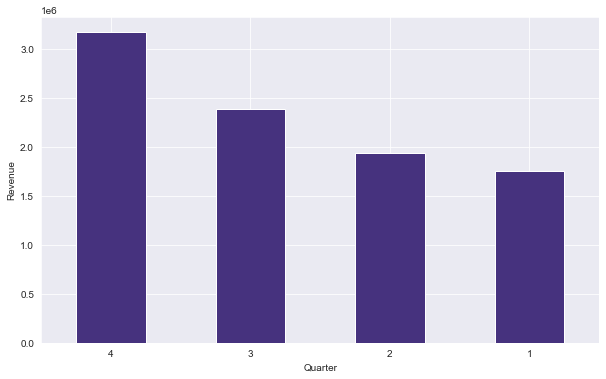

In [92]:
plt.figure(figsize = (10, 6))
sns.set_style('darkgrid')
Quarter_data['Revenue'].plot.bar()
plt.ylabel("Revenue")
plt.xlabel("Quarter")
plt.xticks(rotation=0)
plt.show()

In [93]:
data[data['Quarter'] == 1]

InvoiceNo StockCode                    Description  Quantity  \
34804   539993    22386     JUMBO BAG PINK POLKADOT        10         
34805   539993    21499     BLUE POLKADOT WRAP             25         
34806   539993    21498     RED RETROSPOT WRAP             25         
34807   539993    22379     RECYCLING BAG RETROSPOT        5          
34808   539993    20718     RED RETROSPOT SHOPPER BAG      10         
...        ...      ...                           ...      ..         
131452  548687    75131     METAL TUBE CHIME ON BAMBOO     392        
131453  548687    85150     LADIES & GENTLEMEN METAL SIGN  48         
131454  548687    22607     WOODEN ROUNDERS GARDEN SET     4          
131455  548687    22605     WOODEN CROQUET GARDEN SET      4          
131456  548692    22138     BAKING SET 9 PIECE RETROSPOT   2          

               InvoiceDate  UnitPrice  CustomerID       Date  Quarter  Revenue  
34804  2019-01-02 10:00:00 1.950       13313      2019-01-02  1       19.500    
34805  2019-01-02 10:00:00 0.420       13313      2019-01-02  1       10.500    
34806  2019-01-02 10:00:00 0.420       13313      2019-01-02  1       10.500    
34807  2019-01-02 10:00:00 2.100       13313      2019-01-02  1       10.500    
34808  2019-01-02 10:00:00 1.250       13313      2019-01-02  1       12.500    
...                    ...   ...         ...             ... ..          ...    
131452 2019-03-30 16:50:00 1.000       14195      2019-03-30  1       392.000   
131453 2019-03-30 16:50:00 2.100       14195      2019-03-30  1       100.800   
131454 2019-03-30 16:50:00 9.950       14195      2019-03-30  1       39.800    
131455 2019-03-30 16:50:00 12.750      14195      2019-03-30  1       51.000    
131456 2019-03-30 17:04:00 4.950       0          2019-03-30  1       9.900     

[95477 rows x 10 columns]

In [94]:
data.query("Quarter==1")['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    517
SET OF 3 CAKE TINS PANTRY DESIGN      480
REGENCY CAKESTAND 3 TIER              437
JUMBO BAG RED RETROSPOT               412
SET OF 6 SPICE TINS PANTRY DESIGN     356
                                     ... 
GREEN SQUARE COMPACT MIRROR           1  
OCEAN STRIPE HAMMOCK                  1  
INCENSE BAZAAR PEACH                  1  
CD WALL TIDY RED FLOWERS              1  
VINTAGE BEAD COSMETIC BAG             1  
Name: Description, Length: 2907, dtype: int64

InvoiceNo StockCode                   Description  Quantity  \
43528   540647    22655     VINTAGE RED KITCHEN CABINET   1          
108134  546480    22656     VINTAGE BLUE KITCHEN CABINET  1          
122563  547814    22656     VINTAGE BLUE KITCHEN CABINET  1          

               InvoiceDate  UnitPrice  CustomerID       Date  Quarter  Revenue  
43528  2019-01-08 14:57:00 295.000     17406      2019-01-08  1       295.000   
108134 2019-03-12 11:38:00 295.000     13452      2019-03-12  1       295.000   
122563 2019-03-23 14:19:00 295.000     13452      2019-03-23  1       295.000

InvoiceNo StockCode            Description  Quantity  \
87687  544612    22053     EMPIRE DESIGN ROSETTE  3906       

              InvoiceDate  UnitPrice  CustomerID       Date  Quarter   Revenue  
87687 2019-02-20 10:43:00 0.820       18087      2019-02-20  1       3,202.920

InvoiceNo StockCode            Description  Quantity  \
44010  540689    22470     HEART OF WICKER LARGE  1284       

              InvoiceDate  UnitPrice  CustomerID       Date  Quarter   Revenue  
44010 2019-01-09 08:43:00 3.210       17450      2019-01-09  1       4,121.640

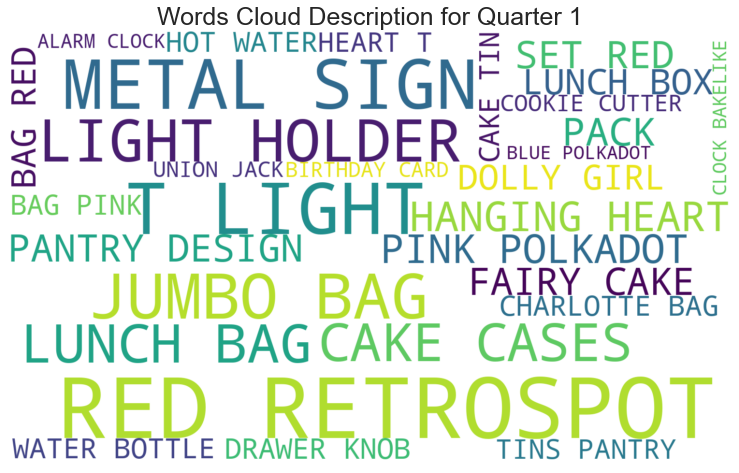

In [95]:
Quarter1 = data.query("Quarter==1")['Description'].dropna().to_string(index=False)
vizualization(Quarter1, "Words Cloud Description for Quarter 1") 

display_max_min(data.query("Quarter==1"))

InvoiceNo StockCode                     Description  Quantity  \
207676  556444    22502     PICNIC BASKET WICKER 60 PIECES  60         
207677  556446    22502     PICNIC BASKET WICKER 60 PIECES  1          

               InvoiceDate  UnitPrice  CustomerID       Date  Quarter  \
207676 2019-06-08 15:28:00 649.500     15098      2019-06-08  2         
207677 2019-06-08 15:33:00 649.500     15098      2019-06-08  2         

          Revenue  
207676 38,970.000  
207677 649.500

InvoiceNo StockCode           Description  Quantity  \
191825  554868    22197     SMALL POPCORN HOLDER  4300       

               InvoiceDate  UnitPrice  CustomerID       Date  Quarter  \
191825 2019-05-25 10:52:00 0.720       13135      2019-05-25  2         

         Revenue  
191825 3,096.000

InvoiceNo StockCode                     Description  Quantity  \
207676  556444    22502     PICNIC BASKET WICKER 60 PIECES  60         

               InvoiceDate  UnitPrice  CustomerID       Date  Quarter  \
207676 2019-06-08 15:28:00 649.500     15098      2019-06-08  2         

          Revenue  
207676 38,970.000

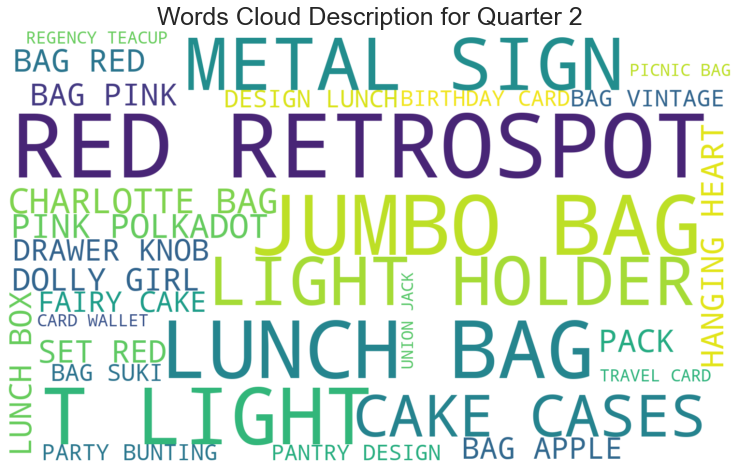

In [96]:
Quarter2 = data.query("Quarter==2")['Description'].dropna().to_string(index=False)
vizualization(Quarter2, "Words Cloud Description for Quarter 2") 

display_max_min(data.query("Quarter==2"))

In [97]:
data.query("Quarter==2")['Description'].value_counts()

PARTY BUNTING                          635
WHITE HANGING HEART T-LIGHT HOLDER     545
JUMBO BAG RED RETROSPOT                499
REGENCY CAKESTAND 3 TIER               475
SPOTTY BUNTING                         407
                                      ... 
IVORY PENDANT TRIPLE SHELL NECKLACE    1  
CRACKED GLAZE NECKLACE IVORY           1  
ANT COPPER RED BOUDICCA BRACELET       1  
ORANGE/FUSCHIA STONES NECKLACE         1  
LEAVES MAGNETIC  SHOPPING LIST         1  
Name: Description, Length: 3079, dtype: int64

InvoiceNo StockCode                         Description  Quantity  \
294556  564357    22827     RUSTIC  SEVENTEEN DRAWER SIDEBOARD  1          
314480  566184    22827     RUSTIC  SEVENTEEN DRAWER SIDEBOARD  1          
326019  567139    22828     REGENCY MIRROR WITH SHUTTERS        1          
330944  567616    22827     RUSTIC  SEVENTEEN DRAWER SIDEBOARD  1          

               InvoiceDate  UnitPrice  CustomerID       Date  Quarter  Revenue  
294556 2019-08-22 15:51:00 165.000     14973      2019-08-22  3       165.000   
314480 2019-09-07 13:01:00 165.000     16723      2019-09-07  3       165.000   
326019 2019-09-14 14:45:00 165.000     13563      2019-09-14  3       165.000   
330944 2019-09-19 12:23:00 165.000     14911      2019-09-19  3       165.000

InvoiceNo StockCode                          Description  Quantity  \
254119  560599    18007     ESSENTIAL BALM 3.5g TIN IN ENVELOPE  3186       

               InvoiceDate  UnitPrice  CustomerID       Date  Quarter  Revenue  
254119 2019-07-17 17:04:00 0.060       14609      2019-07-17  3       191.160

InvoiceNo StockCode                          Description  Quantity  \
329154  567423    23243     SET OF TEA COFFEE SUGAR TINS PANTRY  1412       

               InvoiceDate  UnitPrice  CustomerID       Date  Quarter  \
329154 2019-09-18 11:05:00 5.060       17450      2019-09-18  3         

         Revenue  
329154 7,144.720

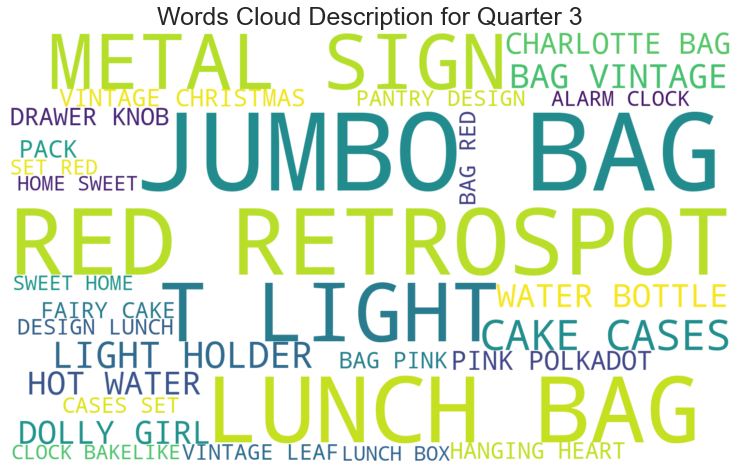

In [98]:
Quarter3 = data.query("Quarter==3")['Description'].dropna().to_string(index=False)
vizualization(Quarter3, "Words Cloud Description for Quarter 3") 

display_max_min(data.query("Quarter==3"))

In [99]:
data.query("Quarter==3")['Description'].value_counts()

JUMBO BAG RED RETROSPOT               570
WHITE HANGING HEART T-LIGHT HOLDER    502
SPOTTY BUNTING                        492
PARTY BUNTING                         481
LUNCH BAG RED RETROSPOT               432
                                     ... 
CRYSTAL HOOP EARRING FLORAL LEAF      1  
AMETHYST DIAMANTE EXPANDABLE RING     1  
BLACK+WHITE NECKLACE W TASSEL         1  
SILVER ROCCOCO CHANDELIER             1  
WALL ART LOVES' SECRET                1  
Name: Description, Length: 3118, dtype: int64

InvoiceNo StockCode                    Description  Quantity  \
18391  538354    22826     LOVE SEAT ANTIQUE WHITE METAL  2          

              InvoiceDate  UnitPrice  CustomerID       Date  Quarter  Revenue  
18391 2018-12-08 15:45:00 175.000     16873      2018-12-08  4       350.000

InvoiceNo StockCode                        Description  Quantity  \
399307  573008    84077     WORLD WAR 2 GLIDERS ASSTD DESIGNS  4800       

               InvoiceDate  UnitPrice  CustomerID       Date  Quarter  \
399307 2019-10-25 12:26:00 0.210       12901      2019-10-25  4         

         Revenue  
399307 1,008.000

InvoiceNo StockCode         Description  Quantity         InvoiceDate  \
399276  573003    23084     RABBIT NIGHT LIGHT  2400     2019-10-25 12:11:00   

        UnitPrice  CustomerID       Date  Quarter   Revenue  
399276 2.080       14646      2019-10-25  4       4,992.000

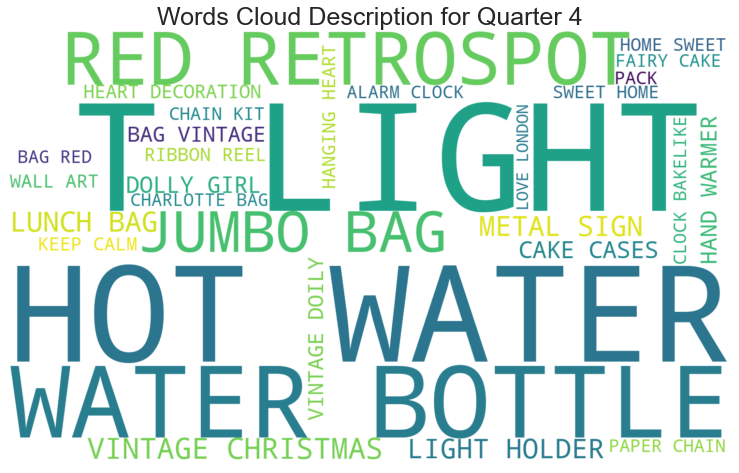

In [100]:
Quarter4 = data.query("Quarter==4")['Description'].dropna().to_string(index=False)
vizualization(Quarter4, "Words Cloud Description for Quarter 4") 

display_max_min(data.query("Quarter==4"))

In [101]:
data.query("Quarter==4")['Description'].value_counts()

PAPER CHAIN KIT 50'S CHRISTMAS        795
WHITE HANGING HEART T-LIGHT HOLDER    635
RABBIT NIGHT LIGHT                    617
PAPER CHAIN KIT VINTAGE CHRISTMAS     564
JUMBO BAG RED RETROSPOT               543
                                     ... 
DOLLY GIRL MINI RUCKSACK              1  
FLOWER FAIRY INCENSE BOUQUET          1  
RIDGED GLASS FINGER BOWL              1  
COPPER AND BRASS BAG CHARM            1  
SILVER FLOWR PINK SHELL NECKLACE      1  
Name: Description, Length: 3645, dtype: int64

## Categorization of product description

In [166]:
data['Description'] = data['Description'].str.lower()

descriptions = data["Description"].unique().tolist()

# create a dictionary mapping each word to its frequency
word_freq = Counter(" ".join(descriptions).split())
sorted_counter = sorted(word_freq.items(), key=lambda x: x[1], reverse=True) 
sorted_counter

[('pink', 277),
 ('set', 275),
 ('of', 237),
 ('heart', 232),
 ('vintage', 213),
 ('blue', 208),
 ('red', 193),
 ('bag', 161),
 ('christmas', 148),
 ('glass', 143),
 ('box', 132),
 ('white', 127),
 ('design', 127),
 ('holder', 114),
 ('small', 111),
 ('flower', 111),
 ('metal', 109),
 ('large', 101),
 ('hanging', 99),
 ('decoration', 98),
 ('wall', 97),
 ('rose', 97),
 ('retrospot', 96),
 ('black', 93),
 ('green', 93),
 ('candle', 91),
 ('3', 90),
 ('t-light', 87),
 ('necklace', 84),
 ('silver', 83),
 ('paper', 81),
 ('cake', 80),
 ('with', 78),
 ('and', 77),
 ('art', 77),
 ('card', 73),
 ('polkadot', 71),
 ('in', 71),
 ('garden', 71),
 ('mug', 68),
 ('4', 65),
 ('pack', 64),
 ('wrap', 64),
 ('cover', 64),
 ('ivory', 64),
 ('sign', 63),
 ('bracelet', 63),
 ('6', 62),
 ('assorted', 58),
 ('12', 58),
 ('egg', 58),
 ('mini', 58),
 ('star', 57),
 ('love', 56),
 ('tea', 54),
 ('tree', 53),
 ('gift', 53),
 ('bowl', 53),
 ('zinc', 49),
 ('frame', 49),
 ('cushion', 49),
 ('home', 49),
 ('mirro

### Main Categorization

In [103]:


main_list = {
    'Holidays':('christmas','holiday','greeting','birthday','garland', 'gift', 'decoration', 'card', 'paper',
                'wrap', 'star', 'party', 'easter', 'cards', 'birthday'),
    'Jewerly':('necklace','pendant','jewelled', 'bracelet', 'earrings', 'ring', 'charm', 
               'diamante','jewellery', 'bead'),
    'Bags':('bag','wallet','pocket','handbag', 'purse', 'lunch'),
    'Home':('home','house','picture','lights','number','door','magnets','book','spot','table','drawer','key','garden',
            'holder','curtain','lantern','chandelier','lamp', 'hook', 'coat rack','bathroom','box', 'photo',
            'candles','clock','cushion','frame','mirror', 'sign','t-light','light','candle','wall','decoration',
            'design','desk','cushion', 'clock'),
    'Kitchen':('pot','diner','food','tissues','dish','dinner','light','basket','storage','water','hot','jar',
               'ceramic','spoon','cutlery','bin','breakfast','folk','tea','plate','cup','bowl','mug',
               'holder','placemats','picnic','beakers','saucer','container', 'glass', 'bottle', 'tray', 'pan', 'kitchen'),
    'Bakery':('chocolate','cookie','milk','baking','jam','coffee','cake','pantry'),
    'Style':('vintage','victorian','edwardian','classic', 'baroque', 'antique','wood','wooden', 'flower'),
    'Toys':('dolly','mice','soldier','game','naughts','bird','kids','doll','jigsaw','toy','bunny','childrens','dolly',
            'girl','ducks','mobile','dolphins','teddy','gingham', 'spaceboy' ),
    'Cloth':('hat','poncho','sock','sombrero','hand warmer', 'umbrella'),
    'Small Things':('cases','tube','pencils','paint','pen','plasters','sewing kit','doiley','first aid','scissor',
                    'lip gloss','rubber','tins','doily','balm','tag','doilies','magnets','silk fan', 'stamp',
                   'erasers','sponge','incense','beaker','coaster','ribbon reel','craft','led','clay','spinning')
}


newdict = {i: k for k, v in main_list.items() for i in v}

data['Category']=data.Description.str.findall('|'.join(newdict.keys())).str[0].map(newdict)

In [104]:
data['Category'] = data['Category'].replace(np.nan, 'Others')

In [105]:
data['Category'].value_counts()

Home            125365
Kitchen         75077 
Holidays        51619 
Style           45810 
Bags            41945 
Small Things    41567 
Others          37855 
Bakery          30547 
Toys            26834 
Jewerly         9856  
Cloth           4528  
Name: Category, dtype: int64

In [106]:
data[data['Category'] == "Style"]

InvoiceNo StockCode                          Description  Quantity  \
38      536852    21791     vintage heads and tails card game    12         
59      536856    21790     vintage snap cards                   12         
60      536856    21791     vintage heads and tails card game    12         
70      536856    22845     vintage cream cat food container     2          
74      536856    22798     antique glass dressing table pot     8          
...        ...      ...                                  ...    ..          
496282  580369    23467     vintage zinc planter                 2          
496304  580373    23376     pack of 12 vintage christmas tissue  24         
496308  580373    23312     vintage christmas gift sack          8          
496309  580373    23313     vintage christmas bunting            15         
496330  580374    82483     wood 2 drawer cabinet white finish   6          

               InvoiceDate  UnitPrice  CustomerID       Date  Quarter  \
38     2018-12-01 09:51:00 1.250       12686      2018-12-01  4         
59     2018-12-01 10:26:00 0.850       13370      2018-12-01  4         
60     2018-12-01 10:26:00 1.250       13370      2018-12-01  4         
70     2018-12-01 10:26:00 6.350       13370      2018-12-01  4         
74     2018-12-01 10:26:00 2.950       13370      2018-12-01  4         
...                    ...   ...         ...             ... ..         
496282 2019-11-30 16:44:00 3.290       0          2019-11-30  4         
496304 2019-11-30 17:06:00 0.390       14788      2019-11-30  4         
496308 2019-11-30 17:06:00 4.150       14788      2019-11-30  4         
496309 2019-11-30 17:06:00 4.950       14788      2019-11-30  4         
496330 2019-11-30 17:12:00 6.950       17584      2019-11-30  4         

        Revenue Category  
38     15.000    Style    
59     10.200    Style    
60     15.000    Style    
70     12.700    Style    
74     23.600    Style    
...       ...      ...    
496282 6.580     Style    
496304 9.360     Style    
496308 33.200    Style    
496309 74.250    Style    
496330 41.700    Style    

[45810 rows x 11 columns]

In [107]:
data[data['Category'] == "Others"]['Revenue'].sum()

473973.971

In [108]:
quarter_cat = (data.groupby(['Category'])
              .agg({'Category':'count', 'Revenue':'sum'})
              .rename(index={('Category', 'count'):'Count'})
              .sort_values(by='Revenue', ascending=False))
quarter_cat

Category       Revenue
Category                            
Home          125365   2,502,429.883
Kitchen       75077    1,538,908.610
Style         45810    939,034.840  
Bags          41945    903,775.270  
Holidays      51619    823,381.240  
Small Things  41567    707,081.640  
Bakery        30547    696,476.470  
Others        37855    473,973.971  
Toys          26834    450,134.070  
Jewerly       9856     121,754.320  
Cloth         4528     99,659.500

The data shows the revenue generated by 11 different product categories. 

- Home category has the highest revenue of 2,178,970 and has 94,806 items sold.
- Kitchen category has the second-highest revenue of 1,285,457 and has 55,266 items sold.
- Style category has revenue of 793,798 and has 34,737 items sold.


Home, Kitchen, and Style categories have the highest revenue, while Jewelry and Cloth categories have the lowest revenue. The business should focus on promoting and growing the high-revenue categories while also monitoring the low-revenue categories to identify potential growth opportunities.

Based on the data, the highest number of items sold are in the Home category, followed by the Kitchen category. The lowest number of items sold are in the Cloth category, followed by the Jewelry category. The business should focus on promoting and growing categories with high numbers of items sold while also monitoring categories with low numbers of items sold to identify potential growth opportunities.

The ratio of sold items to revenue is different for each of our product categories. 
For example, in the Home category, 94,806 items were sold and generated a revenue of 2,178,970, which means that on average, each item sold in the **Home category generated around 22.99 dollars in revenue**.

In contrast, in the Jewelry category, only 5,841 items were sold, but generated a revenue of 95,357 dollars, which means that on average, each item sold in the **Jewelry category generated around 16.32 dollars in revenue**.

The business should focus on promoting and growing categories with a high ratio of goods sold to revenue, as these categories are likely generating more revenue per item sold. At the same time, the business should also monitor categories with a low ratio of goods sold to revenue to identify potential growth opportunities.

### Colors categories

In [109]:
data['Description'].value_counts()

white hanging heart t-light holder    2199
jumbo bag red retrospot               2024
regency cakestand 3 tier              1843
party bunting                         1652
lunch bag red retrospot               1499
                                      ... 
laser cut multi strand necklace       1   
baroque butterfly earrings red        1   
marie antoienett trinket box gold     1   
orange/fuschia stones necklace        1   
set 10 cards hanging baubles 17080    1   
Name: Description, Length: 3989, dtype: int64

In [110]:
#Creating color list
colors_list = ['red', 'rose','yellow', 'green',"cream", 'pink', 'blue', 'ivory', 
               'purple', 'white','black', 'silver', 'gold',
               'brown','grey','gray' ,'orange' ,'violet' ,'colour']


In [111]:
colors_re = '|'.join(colors_list)
data['Color'] = data['Description'].str.extract(f'({colors_re})', expand=False)
data['Color'] = data['Color'].fillna('no color')
display(data.stb.freq(['Color'], style = True, cum_cols = False))


### Categories by size

In [112]:
#Creating size list
size_list = ['set', 'box', 'small', 'large', 'size' ,'pack', 'tin', 'medium', 'kit', 'boxes' ,'set/6']

In [113]:
size_re = '|'.join(size_list)
data['Size'] = data['Description'].str.extract(f'({size_re})', expand=False)
data['Size'] = data['Size'].fillna('no size')
display(data.stb.freq(['Size'], style = True, cum_cols = False))

In [114]:
#from nltk.tokenize import word_tokenize

# tokenize the "Description" column
#data["tokens"] = data["Description"].apply(word_tokenize)


## Tableau visualization

In [115]:
data_to_tableau = data[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Date', 'Revenue', 'Category', 'Color', 'Size']]
data_to_tableau

InvoiceNo StockCode                         Description  Quantity  \
0       536847    22155     star decoration rustic              48         
1       536847    21807     white christmas star decoration     36         
2       536847    22161     heart decoration rustic hanging     24         
3       536847    22065     christmas pudding trinket pot       24         
4       536847    20956     porcelain t-light holders assorted  12         
...        ...      ...                                    ...  ..         
496338  580375    23013     glass apothecary bottle tonic       24         
496339  580375    23012     glass apothecary bottle perfume     12         
496340  580375    23579     snack tray i love london            16         
496341  580375    23418     lavender toilette bottle            12         
496342  580375    23338     egg frying pan red                  12         

               InvoiceDate  UnitPrice  CustomerID       Date  Revenue  \
0      2018-12-01 09:31:00 0.420       17135      2018-12-01 20.160     
1      2018-12-01 09:31:00 0.420       17135      2018-12-01 15.120     
2      2018-12-01 09:31:00 0.650       17135      2018-12-01 15.600     
3      2018-12-01 09:31:00 1.450       17135      2018-12-01 34.800     
4      2018-12-01 09:31:00 1.250       17135      2018-12-01 15.000     
...                    ...   ...         ...             ...    ...     
496338 2019-11-30 17:13:00 3.450       14031      2019-11-30 82.800     
496339 2019-11-30 17:13:00 3.450       14031      2019-11-30 41.400     
496340 2019-11-30 17:13:00 1.950       14031      2019-11-30 31.200     
496341 2019-11-30 17:13:00 2.080       14031      2019-11-30 24.960     
496342 2019-11-30 17:13:00 2.080       14031      2019-11-30 24.960     

        Category     Color     Size  
0       Holidays  no color  no size  
1       Holidays  white     no size  
2       Home      no color  no size  
3       Holidays  no color  no size  
4       Home      no color  no size  
...      ...           ...      ...  
496338  Kitchen   no color  no size  
496339  Kitchen   no color  no size  
496340  Kitchen   no color  no size  
496341  Kitchen   no color  no size  
496342  Kitchen   red       no size  

[491003 rows x 12 columns]

In [116]:
data_to_tableau.to_csv("ecomm_to_tableau.csv", index=False)


**----------------------------------------------------------------------------------------------------------------------------------**

**For this project, a visualization was made in Tableau, we can explore the data, patterns, using this link.**

https://public.tableau.com/app/profile/lana.dashevsky/viz/e-commerceproject_pres/SalesOverview

**----------------------------------------------------------------------------------------------------------------------------------**

## RFM model for customers

**`RFM (Recency, Frequency, Monetary)`** is a customer segmentation model used in marketing to analyze customer behavior and value. It categorizes customers based on the following three parameters:

- **Recency**: How recently a customer made a purchase  
- **Frequency**: How often a customer makes a purchase
- **Monetary**: How much a customer spends


Since we have about 25% of buyers whom we cannot identify and we assumed that they are all united by one attribute that we do not know, then in order to further study the behavior of buyers, we will exclude them from our data and will consider only those buyers who which are identified.

In [117]:
data_rfm = data.query('CustomerID > 0')

In [118]:
data_rfm['Date'].max()

Timestamp('2019-11-30 00:00:00')

In [119]:
import datetime as dt
NOW= data_rfm['Date'].max()
rfmTable = data_rfm.groupby('CustomerID').agg({'Date': lambda x: (NOW - x.max()).days, # Recency
                                        'InvoiceNo': lambda x: x.nunique(), # Frequency
                                        'Revenue': lambda x: x.sum()}) # Monetary Value

rfmTable['Date'] = rfmTable['Date'].astype(int)
rfmTable.rename(columns={'Date': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Revenue': 'Monetary_value'}, inplace=True)

### Validating the RFM Table

In [120]:
rfmTable.head()

Recency  Frequency  Monetary_value
CustomerID                                    
12347       32       6         4,085.180      
12348       68       4         1,437.240      
12349       11       1         1,457.550      
12350       303      1         294.400        
12352       29       5         1,125.280

In [121]:
data_rfm[data_rfm['CustomerID'] == 12350]

InvoiceNo StockCode                      Description  Quantity  \
71179  543037    21908     chocolate this way metal sign    12         
71180  543037    22412     metal sign neighbourhood witch   12         
71181  543037    79066K    retro mod tray                   10         
71182  543037    79191C    retro plastic elephant tray      12         
71183  543037    22348     tea bag plate red retrospot      24         
71184  543037    84086C    pink/purple retro radio          6          
71185  543037    22551     plasters in tin spaceboy         12         
71186  543037    22557     plasters in tin vintage paisley  12         
71187  543037    21832     chocolate calculator             12         
71188  543037    21915     red  harmonica in box            12         
71189  543037    22620     4 traditional spinning tops      12         
71190  543037    21171     bathroom metal sign              12         
71191  543037    21864     union jack flag passport cover   12         
71192  543037    21866     union jack flag luggage tag      12         
71193  543037    20652     blue polkadot luggage tag        12         
71194  543037    20615     blue polkadot passport cover     12         

              InvoiceDate  UnitPrice  CustomerID       Date  Quarter  Revenue  \
71179 2019-01-31 16:01:00 2.100       12350      2019-01-31  1       25.200     
71180 2019-01-31 16:01:00 2.100       12350      2019-01-31  1       25.200     
71181 2019-01-31 16:01:00 0.850       12350      2019-01-31  1       8.500      
71182 2019-01-31 16:01:00 0.850       12350      2019-01-31  1       10.200     
71183 2019-01-31 16:01:00 0.850       12350      2019-01-31  1       20.400     
71184 2019-01-31 16:01:00 2.950       12350      2019-01-31  1       17.700     
71185 2019-01-31 16:01:00 1.650       12350      2019-01-31  1       19.800     
71186 2019-01-31 16:01:00 1.650       12350      2019-01-31  1       19.800     
71187 2019-01-31 16:01:00 1.650       12350      2019-01-31  1       19.800     
71188 2019-01-31 16:01:00 1.250       12350      2019-01-31  1       15.000     
71189 2019-01-31 16:01:00 1.250       12350      2019-01-31  1       15.000     
71190 2019-01-31 16:01:00 1.450       12350      2019-01-31  1       17.400     
71191 2019-01-31 16:01:00 2.100       12350      2019-01-31  1       25.200     
71192 2019-01-31 16:01:00 1.250       12350      2019-01-31  1       15.000     
71193 2019-01-31 16:01:00 1.250       12350      2019-01-31  1       15.000     
71194 2019-01-31 16:01:00 2.100       12350      2019-01-31  1       25.200     

           Category     Color     Size  
71179  Bakery        no color  no size  
71180  Home          no color  no size  
71181  Kitchen       no color  no size  
71182  Kitchen       no color  no size  
71183  Kitchen       red       no size  
71184  Others        pink      no size  
71185  Small Things  no color  tin      
71186  Small Things  no color  tin      
71187  Bakery        no color  no size  
71188  Home          red       box      
71189  Small Things  no color  no size  
71190  Home          no color  no size  
71191  Others        no color  no size  
71192  Small Things  no color  no size  
71193  Small Things  blue      no size  
71194  Others        blue      no size

### Determining RFM Quartiles

In [122]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles

Recency  Frequency  Monetary_value
0.250 15.000   1.000      299.050        
0.500 47.000   2.000      642.410        
0.750 141.000  4.000      1,560.380

In [123]:
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 15.0, 0.5: 47.0, 0.75: 141.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 4.0},
 'Monetary_value': {0.25: 299.04999999999995,
  0.5: 642.41,
  0.75: 1560.3799999999994}}

### Creating the RFM segmentation table

In [124]:
rfmSegmentation = rfmTable

In [125]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [126]:
rfmSegmentation['R_Quartile'] = rfmSegmentation['Recency'].apply(RClass, args=('Recency',quantiles,))
rfmSegmentation['F_Quartile'] = rfmSegmentation['Frequency'].apply(FMClass, args=('Frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['Monetary_value'].apply(FMClass, args=('Monetary_value',quantiles,))

rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Quartile.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)
rfmSegmentation.head()
rfmSegmentation.reset_index(inplace=True)

rfmSegmentation

CustomerID  Recency  Frequency  Monetary_value  R_Quartile  F_Quartile  \
0     12347       32       6         4,085.180        3           4            
1     12348       68       4         1,437.240        2           3            
2     12349       11       1         1,457.550        4           1            
3     12350       303      1         294.400          1           1            
4     12352       29       5         1,125.280        3           4            
...     ...       ..      ..               ...       ..          ..            
4252  18280       270      1         180.600          1           1            
4253  18281       173      1         80.820           1           1            
4254  18282       0        2         178.050          4           2            
4255  18283       2        15        1,831.580        4           4            
4256  18287       35       3         1,837.280        3           3            

      M_Quartile RFMClass  
0     4           344      
1     3           233      
2     3           413      
3     1           111      
4     3           343      
...  ..           ...      
4252  1           111      
4253  1           111      
4254  1           421      
4255  4           444      
4256  4           334      

[4257 rows x 8 columns]

In [127]:
# Setting up the label for each client and adding the column "Label" to the dataframe
rfmSegmentation['Total_Score'] = rfmSegmentation['R_Quartile'] + rfmSegmentation['F_Quartile'] +rfmSegmentation['M_Quartile']
rfmSegmentation

CustomerID  Recency  Frequency  Monetary_value  R_Quartile  F_Quartile  \
0     12347       32       6         4,085.180        3           4            
1     12348       68       4         1,437.240        2           3            
2     12349       11       1         1,457.550        4           1            
3     12350       303      1         294.400          1           1            
4     12352       29       5         1,125.280        3           4            
...     ...       ..      ..               ...       ..          ..            
4252  18280       270      1         180.600          1           1            
4253  18281       173      1         80.820           1           1            
4254  18282       0        2         178.050          4           2            
4255  18283       2        15        1,831.580        4           4            
4256  18287       35       3         1,837.280        3           3            

      M_Quartile RFMClass  Total_Score  
0     4           344      11           
1     3           233      8            
2     3           413      8            
3     1           111      3            
4     3           343      10           
...  ..           ...      ..           
4252  1           111      3            
4253  1           111      3            
4254  1           421      7            
4255  4           444      12           
4256  4           334      10           

[4257 rows x 9 columns]

In [128]:
data_rfm[data_rfm['CustomerID'] == 18283]

InvoiceNo StockCode                  Description  Quantity  \
38215   540350    22356     charlotte bag pink polkadot  1          
38216   540350    20726     lunch bag woodland           1          
38217   540350    22384     lunch bag pink polkadot      1          
38218   540350    22386     jumbo bag pink polkadot      1          
38219   540350    20717     strawberry shopper bag       1          
...        ...      ...                        ...      ..          
488564  579673    23582     vintage doily jumbo bag red  3          
488565  579673    23201     jumbo bag alphabet           3          
488566  579673    85099B    jumbo bag red retrospot      3          
488567  579673    23581     jumbo bag paisley park       3          
488568  579673    23344     jumbo bag 50's christmas     10         

               InvoiceDate  UnitPrice  CustomerID       Date  Quarter  \
38215  2019-01-04 14:14:00 0.850       18283      2019-01-04  1         
38216  2019-01-04 14:14:00 1.650       18283      2019-01-04  1         
38217  2019-01-04 14:14:00 1.650       18283      2019-01-04  1         
38218  2019-01-04 14:14:00 1.950       18283      2019-01-04  1         
38219  2019-01-04 14:14:00 1.250       18283      2019-01-04  1         
...                    ...   ...         ...             ... ..         
488564 2019-11-28 12:59:00 2.080       18283      2019-11-28  4         
488565 2019-11-28 12:59:00 2.080       18283      2019-11-28  4         
488566 2019-11-28 12:59:00 2.080       18283      2019-11-28  4         
488567 2019-11-28 12:59:00 2.080       18283      2019-11-28  4         
488568 2019-11-28 12:59:00 2.080       18283      2019-11-28  4         

        Revenue Category     Color     Size  
38215  0.850     Bags     pink      no size  
38216  1.650     Bags     no color  no size  
38217  1.650     Bags     pink      no size  
38218  1.950     Bags     pink      no size  
38219  1.250     Bags     no color  no size  
...      ...      ...          ...      ...  
488564 6.240     Style    red       no size  
488565 6.240     Bags     no color  no size  
488566 6.240     Bags     red       no size  
488567 6.240     Bags     no color  no size  
488568 20.800    Bags     no color  no size  

[669 rows x 13 columns]

In [129]:
rfmSegmentation.RFMClass.nunique()

61

In [130]:

RFM_Class = (rfmSegmentation.groupby(['RFMClass'])
             .agg({"Recency": "mean", "Frequency": "mean", "Monetary_value": ['mean', 'count']}))

RFM_Class

Recency Frequency Monetary_value      
            mean      mean           mean count
RFMClass                                       
111      256.514 1.000     160.494         434 
112      248.760 1.000     407.406         221 
113      251.789 1.000     962.937         38  
114      253.100 1.000     2,948.673       10  
121      207.763 2.000     210.078         59  
...          ...   ...         ...         ..  
434      6.860   3.702     2,817.168       57  
441      4.000   7.000     191.170         1   
442      6.750   5.625     505.692         8   
443      6.571   6.484     1,188.697       91  
444      5.693   14.987    8,642.727       450 

[61 rows x 4 columns]

In [131]:
rfm_info = pd.read_csv('RFM_info.csv', sep=',')
rfm_info

Total_Score               Label  \
0  12           Champions            
1  11           Loyal Customers      
2  10           Potential Loyalist   
3  9            Recent Customers     
4  8            Promising            
5  7            Needs Attention      
6  6            About To Sleep       
7  5            At Risk              
8  4            Can't Lose Them      
9  3            Hibernating          

                                                                                      About  \
0  Customers who bought most recently, most often and spend the most.                         
1  Customers who buy the most often from your store. Responsive to promotions                 
2  Customers with average frequency and who spent a good amount                               
3  Customers who buy recently from your brand but not frequently.                             
4  Customers who return often, but do not spend a lot.                                        
5  Customers who buy more often and for more money than the average.                          
6  Existing customers who have not made any purchases for a long time.                        
7  Customers who purchased often and spent big amounts, but haven’t purchased recently        
8  Customers who used to visit and purchase quite often, but haven’t been visiting recently   
9  They haven’t been back in a long time, and they haven’t bought anything recently.          

                                                                                                                                                                                                                                                                                  Marketing  
0  Focus on loyalty programs and new product introductions. These customers have proven to have a higher willingness to pay, so don't use discount pricing to generate incremental sales. Instead, focus on value added offers through product recommendations based on previous purchases.  
1  Loyalty programs are effective for these repeat visitors. Advocacy programs and reviews are also common for this group. Lastly, consider rewarding these customers with Free Shipping or other like benefits.                                                                             
2  Offer membership or loyalty programs or recommend related products to upsell them and help them become your Loyalists or Champions.                                                                                                                                                       
3  As they have recently started using the products/ services of your brand, they need to know more about your company. Hence, the company should keep providing continuous support and building relationships.                                                                              
4  You've already succeeded in creating loyalty. Focus on increasing monetization through product recommendations based on past purchases and incentives tied to spending thresholds (pegged to your store AOV).                                                                             
5  To reactivate this segment, we should make further personalization in communication, recommend new products based on their purchase history or communicate to them limited offers.                                                                                                        
6  Try to reconnect with them and make the last push by offering discounts, popular deals, and sharing valuable resources.                                                                                                                                                                   
7  Send them personalized reactivation campaigns to reconnect, and offer renewals and helpful products to encourage another purchase.                                                                                                                     

In [132]:

#merged_df = pd.merge(df1, df2, left_index=True, right_index=True)

rfm_full_Segmentation = pd.merge(rfmSegmentation, rfm_info, on='Total_Score')
rfm_full_Segmentation = rfm_full_Segmentation[['CustomerID', 'Recency', 'Frequency', 'Monetary_value',
                          'R_Quartile', 'F_Quartile', 'M_Quartile', 'RFMClass', 'Total_Score', 'Label', 'About']]
rfm_full_Segmentation

CustomerID  Recency  Frequency  Monetary_value  R_Quartile  F_Quartile  \
0     12347       32       6         4,085.180        3           4            
1     12356       15       3         2,487.430        4           3            
2     12362       28       9         4,213.340        3           4            
3     12380       14       4         2,427.810        4           3            
4     12408       25       5         2,618.550        3           4            
...     ...       ..      ..               ...       ..          ..            
4252  18229       4        19        6,932.700        4           4            
4253  18230       2        7         2,810.200        4           4            
4254  18241       2        17        2,058.090        4           4            
4255  18245       0        7         2,567.060        4           4            
4256  18283       2        15        1,831.580        4           4            

      M_Quartile RFMClass  Total_Score            Label  \
0     4           344      11           Loyal Customers   
1     4           434      11           Loyal Customers   
2     4           344      11           Loyal Customers   
3     4           434      11           Loyal Customers   
4     4           344      11           Loyal Customers   
...  ..           ...      ..                       ...   
4252  4           444      12           Champions         
4253  4           444      12           Champions         
4254  4           444      12           Champions         
4255  4           444      12           Champions         
4256  4           444      12           Champions         

                                                                           About  
0     Customers who buy the most often from your store. Responsive to promotions  
1     Customers who buy the most often from your store. Responsive to promotions  
2     Customers who buy the most often from your store. Responsive to promotions  
3     Customers who buy the most often from your store. Responsive to promotions  
4     Customers who buy the most often from your store. Responsive to promotions  
...                                                                          ...  
4252  Customers who bought most recently, most often and spend the most.          
4253  Customers who bought most recently, most often and spend the most.          
4254  Customers who bought most recently, most often and spend the most.          
4255  Customers who bought most recently, most often and spend the most.          
4256  Customers who bought most recently, most often and spend the most.          

[4257 rows x 11 columns]

### Categorizing

In [133]:
rfm_full_Segmentation['RFMClass'].value_counts()

444    450
111    434
344    235
112    221
211    195
      ... 
242    4  
142    3  
314    3  
441    1  
141    1  
Name: RFMClass, Length: 61, dtype: int64

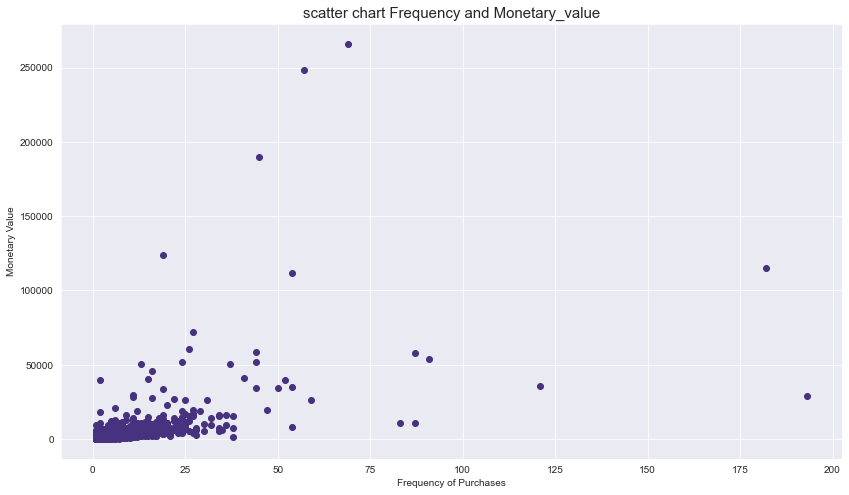

In [134]:
f, ax = plt.subplots(figsize = (14, 8))

plt.title('scatter chart Frequency and Monetary_value', fontdict={'size':15})
sns.set_style('darkgrid')
plt.scatter(rfm_full_Segmentation['Frequency'], rfm_full_Segmentation['Monetary_value'])
plt.xlabel('Frequency of Purchases')
plt.ylabel('Monetary Value')
plt.show()

In [135]:
# Count the frequency that a value occurs in a dataframe column for the labels.

rfm_full_Segmentation['Label'].value_counts()

About To Sleep        485
Can't Lose Them       475
At Risk               474
Champions             450
Hibernating           434
Needs Attention       416
Recent Customers      388
Promising             385
Loyal Customers       383
Potential Loyalist    367
Name: Label, dtype: int64

In [136]:
profiles = rfm_full_Segmentation.groupby("Label").agg({'Recency': 'mean',
                                      'Frequency': 'mean', 'Monetary_value': ['sum', 'mean', 'count']})
profiles.columns = ['Avg_recency', 'Avg_frequency',
              'Sum_Monetary_Value', 'Monetary_Value_mean', 'Customer_Count']
#profiles['%_of_all'] = profiles['Sum_Monetary_Value'].apply(lambda x: x/x.sum()*100)
profiles['%_of_all'] = profiles['Sum_Monetary_Value']/profiles['Sum_Monetary_Value'].sum()*100
profiles.sort_values(by='Sum_Monetary_Value', ascending=False)

Avg_recency  Avg_frequency  Sum_Monetary_Value  \
Label                                                                
Champions          5.693        14.987         3,889,227.020         
Loyal Customers    19.449       7.864          1,439,768.920         
Potential Loyalist 30.995       4.943          683,477.940           
Recent Customers   41.843       3.673          527,132.941           
Promising          57.304       2.878          370,637.040           
Needs Attention    74.200       2.188          369,659.732           
About To Sleep     82.540       1.606          259,124.880           
At Risk            108.414      1.329          176,228.811           
Can't Lose Them    176.017      1.124          134,600.990           
Hibernating        256.514      1.000          69,654.590            

                    Monetary_Value_mean  Customer_Count  %_of_all  
Label                                                              
Champions          8,642.727             450            49.109     
Loyal Customers    3,759.188             383            18.180     
Potential Loyalist 1,862.338             367            8.630      
Recent Customers   1,358.590             388            6.656      
Promising          962.694               385            4.680      
Needs Attention    888.605               416            4.668      
About To Sleep     534.278               485            3.272      
At Risk            371.791               474            2.225      
Can't Lose Them    283.371               475            1.700      
Hibernating        160.494               434            0.880

In [137]:
profiles['Sum_Monetary_Value']

Label
About To Sleep       259,124.880  
At Risk              176,228.811  
Can't Lose Them      134,600.990  
Champions            3,889,227.020
Hibernating          69,654.590   
Loyal Customers      1,439,768.920
Needs Attention      369,659.732  
Potential Loyalist   683,477.940  
Promising            370,637.040  
Recent Customers     527,132.941  
Name: Sum_Monetary_Value, dtype: float64

Based on this data, the `"Champions"` segment has the highest average monetary value per purchase - 8,642, the highest average purchase frequency - 15, and the customer count - 450. And they make up 49% of Total Revenue by all our customers - 3,889,227.

The `"Loyal Customers"` segment has a high customer count - 383, a high frequency of purchases - 7.8, and a relatively high average monetary value - 3,759. They make up 18% of Total Revenue by all our customers - 1,439,768.

The `"Potential Loyalist"` segment has relatively high average monetary value - 1,862 and customer count - 367, making it a good target for building loyalty. And they make up 8% of Total Revenue by all our customers - 683,477.

The `"Recent Customers"` segment has a lower average monetary value - 1,358, but a higher frequency of purchases - 3.7  and customer count compared to other segments - 388. The remaining segments have lower average monetary values, purchase frequencies, and customer counts.


In [138]:
rfm_full_Segmentation.to_csv('rfm_to_tableau.csv', sep=',')
profiles.to_csv('profile_to_tableau.csv', sep=',')

In [139]:
data_rfm

InvoiceNo StockCode                         Description  Quantity  \
0       536847    22155     star decoration rustic              48         
1       536847    21807     white christmas star decoration     36         
2       536847    22161     heart decoration rustic hanging     24         
3       536847    22065     christmas pudding trinket pot       24         
4       536847    20956     porcelain t-light holders assorted  12         
...        ...      ...                                    ...  ..         
496338  580375    23013     glass apothecary bottle tonic       24         
496339  580375    23012     glass apothecary bottle perfume     12         
496340  580375    23579     snack tray i love london            16         
496341  580375    23418     lavender toilette bottle            12         
496342  580375    23338     egg frying pan red                  12         

               InvoiceDate  UnitPrice  CustomerID       Date  Quarter  \
0      2018-12-01 09:31:00 0.420       17135      2018-12-01  4         
1      2018-12-01 09:31:00 0.420       17135      2018-12-01  4         
2      2018-12-01 09:31:00 0.650       17135      2018-12-01  4         
3      2018-12-01 09:31:00 1.450       17135      2018-12-01  4         
4      2018-12-01 09:31:00 1.250       17135      2018-12-01  4         
...                    ...   ...         ...             ... ..         
496338 2019-11-30 17:13:00 3.450       14031      2019-11-30  4         
496339 2019-11-30 17:13:00 3.450       14031      2019-11-30  4         
496340 2019-11-30 17:13:00 1.950       14031      2019-11-30  4         
496341 2019-11-30 17:13:00 2.080       14031      2019-11-30  4         
496342 2019-11-30 17:13:00 2.080       14031      2019-11-30  4         

        Revenue  Category     Color     Size  
0      20.160    Holidays  no color  no size  
1      15.120    Holidays  white     no size  
2      15.600    Home      no color  no size  
3      34.800    Holidays  no color  no size  
4      15.000    Home      no color  no size  
...       ...     ...           ...      ...  
496338 82.800    Kitchen   no color  no size  
496339 41.400    Kitchen   no color  no size  
496340 31.200    Kitchen   no color  no size  
496341 24.960    Kitchen   no color  no size  
496342 24.960    Kitchen   red       no size  

[369628 rows x 13 columns]

In [140]:
rfm_label = rfm_full_Segmentation[['CustomerID', 'Label']]

In [141]:
data = pd.merge(data, rfm_label, on='CustomerID')
data

InvoiceNo StockCode                         Description  Quantity  \
0       536847    22155     star decoration rustic              48         
1       536847    21807     white christmas star decoration     36         
2       536847    22161     heart decoration rustic hanging     24         
3       536847    22065     christmas pudding trinket pot       24         
4       536847    20956     porcelain t-light holders assorted  12         
...        ...      ...                                    ...  ..         
369623  580291    23352     roll wrap 50's red christmas        12         
369624  580291    23351     roll wrap 50's christmas            12         
369625  580331    22112     chocolate hot water bottle          48         
369626  580361    35001G    hand open shape gold                12         
369627  580371    85099B    jumbo bag red retrospot             50         

               InvoiceDate  UnitPrice  CustomerID       Date  Quarter  \
0      2018-12-01 09:31:00 0.420       17135      2018-12-01  4         
1      2018-12-01 09:31:00 0.420       17135      2018-12-01  4         
2      2018-12-01 09:31:00 0.650       17135      2018-12-01  4         
3      2018-12-01 09:31:00 1.450       17135      2018-12-01  4         
4      2018-12-01 09:31:00 1.250       17135      2018-12-01  4         
...                    ...   ...         ...             ... ..         
369623 2019-11-30 13:36:00 1.250       15539      2019-11-30  4         
369624 2019-11-30 13:36:00 1.250       15539      2019-11-30  4         
369625 2019-11-30 15:53:00 4.250       13017      2019-11-30  4         
369626 2019-11-30 16:25:00 1.250       14865      2019-11-30  4         
369627 2019-11-30 16:56:00 2.080       18174      2019-11-30  4         

        Revenue      Category     Color     Size            Label  
0      20.160    Holidays      no color  no size  Loyal Customers  
1      15.120    Holidays      white     no size  Loyal Customers  
2      15.600    Home          no color  no size  Loyal Customers  
3      34.800    Holidays      no color  no size  Loyal Customers  
4      15.000    Home          no color  no size  Loyal Customers  
...       ...     ...               ...      ...              ...  
369623 15.000    Holidays      red       no size  Needs Attention  
369624 15.000    Holidays      no color  no size  Needs Attention  
369625 204.000   Bakery        no color  no size  About To Sleep   
369626 15.000    Small Things  gold      no size  About To Sleep   
369627 104.000   Bags          red       no size  About To Sleep   

[369628 rows x 14 columns]

In [142]:
label_cat = (data.groupby(['Label', 'Category'])
 .agg({'Revenue':'sum', 'InvoiceNo':'count'}))
label_cat

Revenue  InvoiceNo
Label            Category                          
About To Sleep   Bags         14,039.930  840      
                 Bakery       20,483.250  1237     
                 Cloth        4,720.630   201      
                 Holidays     25,865.250  2014     
                 Home         67,312.580  4124     
...                                  ...   ...     
Recent Customers Kitchen      82,801.090  4821     
                 Others       33,794.010  2719     
                 Small Things 44,899.550  3225     
                 Style        56,819.280  3320     
                 Toys         26,886.310  1923     

[110 rows x 2 columns]

The RFM model is used to segment customers based on their Recency (R), Frequency (F), and Monetary Value (M) of their purchases. Here is a brief recommendation for each customer segment:

- Champions: Reward and retain these high-value customers through loyalty programs, exclusive promotions, and personalized communication.

- Loyal Customers: Encourage repeat purchases through targeted email campaigns, upsell opportunities, and special offers.

- Potential Loyalists: Nurture these customers and turn them into loyal customers through targeted communication, personalized recommendations, and loyalty programs.

- Recent Customers: Re-engage these customers through personalized follow-up campaigns, limited time offers, and cross-sell opportunities.

- Promising: Encourage repeat purchases and build loyalty by providing relevant offers, personalized communication, and a positive customer experience.

- Needs Attention: Win back inactive customers through targeted re-engagement campaigns, exclusive offers, and personalized communication.

- About To Sleep: Take action to prevent customer churn by providing personalized communication, special offers, and incentives to re-engage.

- At Risk: Focus on retaining these customers by understanding their needs, providing relevant offers, and improving their customer experience.

- Can't Lose Them: Ensure these high-value customers remain loyal by providing exceptional customer service, personalized communication, and exclusive offers.

- Hibernating: Re-engage these inactive customers through targeted campaigns, incentives, and personalized communication.

## Apriory Algorithm

Apriori basket analysis is a technique used to analyze customer purchasing behavior and product associations in a transaction database. The aim of Apriori basket analysis is to identify frequently occurring combinations of items or products that are purchased together, and use this information to make informed decisions about product placement, promotional offers, and marketing strategies.

The Apriori basket analysis is based on the Apriori algorithm, which calculates the support of each item set by counting the number of transactions in the dataset that contain that item set. The algorithm iteratively generates candidate item sets and calculates the support for each candidate, and discards any candidate item sets that do not meet a specified minimum support threshold. The remaining frequent item sets are then used to identify association rules, which represent relationships between items that are frequently purchased together.

Apriori basket analysis can be useful in a variety of applications, such as market basket analysis, customer segmentation, and product recommendations. It provides valuable insights into customer purchasing behavior and allows companies to make informed decisions about product placement, promotional offers, and marketing strategies. Additionally, Apriori basket analysis can help identify new product opportunities and increase sales by optimizing product combinations and marketing strategies.

In [143]:
#main_country = data[data['CustomerID'] > 0]

In [144]:
basket_main_country = (data.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket_main_country

Description  10 colour spaceboy pen  12 coloured party balloons  \
InvoiceNo                                                         
536847      0.000                   0.000                         
536848      0.000                   0.000                         
536849      0.000                   0.000                         
536851      0.000                   0.000                         
536852      0.000                   0.000                         
...           ...                     ...                         
580371      0.000                   0.000                         
580372      0.000                   0.000                         
580373      0.000                   0.000                         
580374      0.000                   0.000                         
580375      0.000                   0.000                         

Description  12 daisy pegs in wood box  12 egg house painted wood  \
InvoiceNo                                                           
536847      0.000                      0.000                        
536848      0.000                      0.000                        
536849      0.000                      0.000                        
536851      0.000                      0.000                        
536852      0.000                      0.000                        
...           ...                        ...                        
580371      0.000                      0.000                        
580372      0.000                      0.000                        
580373      0.000                      0.000                        
580374      0.000                      0.000                        
580375      0.000                      0.000                        

Description  12 hanging eggs hand painted  12 ivory rose peg place settings  \
InvoiceNo                                                                     
536847      0.000                         0.000                               
536848      0.000                         0.000                               
536849      0.000                         0.000                               
536851      0.000                         0.000                               
536852      0.000                         0.000                               
...           ...                           ...                               
580371      0.000                         0.000                               
580372      0.000                         0.000                               
580373      0.000                         0.000                               
580374      0.000                         0.000                               
580375      0.000                         0.000                               

Description  12 message cards with envelopes  12 pencil small tube woodland  \
InvoiceNo                                                                     
536847      0.000                            0.000                            
536848      0.000                            0.000                            
536849      0.000                            0.000                            
536851      0.000                            0.000                            
536852      0.000                            0.000                            
...           ...                              ...                            
580371      0.000                            0.000                            
580372      0.000                            0.000                            
580373      0.000                            0.000                            
580374      0.000                            0.000                            
580375      0.000                            0.000                            

Description  12 pencils small tube red retrospot  12 pencils small tube skull  \
InvoiceNo                                                                       
536847      

In [145]:
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1

# Encoding the datasets
basket_encoded = basket_main_country.applymap(hot_encode)
basket_main_country = basket_encoded
  
basket_main_country.sample(5)

Description  10 colour spaceboy pen  12 coloured party balloons  \
InvoiceNo                                                         
545710       0                       0                            
562011       0                       0                            
545140       0                       0                            
567386       0                       1                            
577809       0                       0                            

Description  12 daisy pegs in wood box  12 egg house painted wood  \
InvoiceNo                                                           
545710       0                          0                           
562011       0                          0                           
545140       0                          0                           
567386       0                          0                           
577809       0                          0                           

Description  12 hanging eggs hand painted  12 ivory rose peg place settings  \
InvoiceNo                                                                     
545710       0                             0                                  
562011       0                             0                                  
545140       0                             0                                  
567386       0                             0                                  
577809       0                             0                                  

Description  12 message cards with envelopes  12 pencil small tube woodland  \
InvoiceNo                                                                     
545710       0                                0                               
562011       0                                0                               
545140       0                                0                               
567386       0                                0                               
577809       0                                0                               

Description  12 pencils small tube red retrospot  12 pencils small tube skull  \
InvoiceNo                                                                       
545710       0                                    0                             
562011       0                                    0                             
545140       0                                    0                             
567386       0                                    0                             
577809       0                                    0                             

Description  ...  zinc star t-light holder  zinc sweetheart soap dish  \
InvoiceNo    ...                                                        
545710       ...  0                         0                           
562011       ...  0                         0                           
545140       ...  0                         0                           
567386       ...  0                         0                           
577809       ...  0                         0                           

Description  zinc sweetheart wire letter rack  zinc t-light holder star large  \
InvoiceNo                                                                       
545710       0                                 0                                
562011       0                                 0                                
545140       0                                 0                                
567386       0                                 0                                
577809       0                                 0                                

Description  zinc t-light holder stars large  zinc t-light holder stars small  \
InvoiceNo                                                                       
545710       0                                0                                 
562011       0                                0

Apriori algo uses frequent item sets to generate association rules. It is based on the concept that a subset of a frequent item set must also be a frequent item set.
Frequent item set is an itemset whose support value is greater than a threshold value.

In [146]:
import mlxtend
from mlxtend.frequent_patterns import association_rules,apriori

# Building the model
frq_items = apriori(basket_main_country, min_support = 0.025, use_colnames = True)
display(frq_items)

# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
display(rules.head(10))

/Users/lanadashevsky/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



support                                              itemsets
0   0.040     (6 ribbons rustic charm)                            
1   0.036     (60 teatime fairy cake cases)                       
2   0.027     (72 sweetheart fairy cake cases)                    
3   0.042     (alarm clock bakelike green)                        
4   0.025     (alarm clock bakelike ivory)                        
..    ...                              ...                        
147 0.028     (lunch bag  black skull., lunch bag red retrospot)  
148 0.025     (lunch bag cars blue, lunch bag red retrospot)      
149 0.029     (lunch bag pink polkadot, lunch bag red retrospot)  
150 0.026     (lunch bag red retrospot, lunch bag spaceboy design)
151 0.025     (lunch bag suki design, lunch bag red retrospot)    

[152 rows x 2 columns]

antecedents                        consequents  \
2   (pink regency teacup and saucer)   (green regency teacup and saucer)   
5   (green regency teacup and saucer)  (roses regency teacup and saucer)   
4   (roses regency teacup and saucer)  (green regency teacup and saucer)   
0   (alarm clock bakelike green)       (alarm clock bakelike red)          
3   (green regency teacup and saucer)  (pink regency teacup and saucer)    
6   (jumbo bag pink polkadot)          (jumbo bag red retrospot)           
1   (alarm clock bakelike red)         (alarm clock bakelike green)        
14  (lunch bag pink polkadot)          (lunch bag red retrospot)           
9   (lunch bag pink polkadot)          (lunch bag  black skull.)           
18  (lunch bag suki design)            (lunch bag red retrospot)           

    antecedent support  consequent support  support  confidence   lift  \
2  0.031               0.038               0.025    0.819       21.651   
5  0.038               0.042               0.029    0.763       18.026   
4  0.042               0.038               0.029    0.682       18.026   
0  0.042               0.047               0.028    0.671       14.156   
3  0.038               0.031               0.025    0.661       21.651   
6  0.048               0.088               0.030    0.620       7.042    
1  0.047               0.042               0.028    0.593       14.156   
14 0.052               0.071               0.029    0.553       7.836    
9  0.052               0.058               0.026    0.500       8.643    
18 0.051               0.071               0.025    0.495       7.022    

    leverage  conviction  
2  0.024     5.322        
5  0.027     4.039        
4  0.027     3.026        
0  0.026     2.894        
3  0.024     2.861        
6  0.026     2.400        
1  0.026     2.357        
14 0.025     2.079        
9  0.023     1.884        
18 0.022     1.842

In [147]:
basket_main_country['pink regency teacup and saucer'].sum()

531

In [148]:
basket_main_country['green regency teacup and saucer'].sum()

658

In [149]:
basket_main_country['roses regency teacup and saucer'].sum()

736

Based on the values in the table, we can conclude that:

**Rule 3**: If a transaction contains `"pink regency teacup and saucer"`, there is an 81.9% chance that it will also contain `"green regency teacup and saucer"`. The lift value of 21.651 indicates that the presence of "pink regency teacup and saucer" increases the likelihood of `"green regency teacup and saucer"` by more than 21 times compared to if they were independent.

**Rule 4**: If a transaction contains `"green regency teacup and saucer"`, there is a 76.3% chance that it will also contain `"roses regency teacup and saucer"`. The lift value of 18.026 indicates that the presence of `"green regency teacup and saucer"` increases the likelihood of `"roses regency teacup and saucer"` by more than 18 times compared to if they were independent.

### May Basket

In [150]:

june_data = data.query('"2019-05-31" < Date <= "2019-06-30"')

june_data

InvoiceNo StockCode                          Description  Quantity  \
234     556783    23188     vintage  2 meter folding ruler       24         
235     556783    23169     classic glass cookie jar             18         
236     556783    22699     roses regency teacup and saucer      24         
237     556783    22771     clear drawer knob acrylic edwardian  24         
238     556783    23035     drawer knob ceramic ivory            24         
...        ...      ...                           ...            ..         
307829  558738    21989     pack of 20 skull paper napkins       12         
307830  558738    21213     pack of 72 skull cake cases          24         
307831  558738    22332     skulls party bag + sticker set       8          
307832  558738    21086     set/6 red spotty paper cups          12         
307833  558738    21094     set/6 red spotty paper plates        12         

               InvoiceDate  UnitPrice  CustomerID       Date  Quarter  \
234    2019-06-12 13:15:00 1.650       13408      2019-06-12  2         
235    2019-06-12 13:15:00 4.150       13408      2019-06-12  2         
236    2019-06-12 13:15:00 2.550       13408      2019-06-12  2         
237    2019-06-12 13:15:00 1.250       13408      2019-06-12  2         
238    2019-06-12 13:15:00 1.450       13408      2019-06-12  2         
...                    ...   ...         ...             ... ..         
307829 2019-06-29 15:35:00 0.850       12922      2019-06-29  2         
307830 2019-06-29 15:35:00 0.550       12922      2019-06-29  2         
307831 2019-06-29 15:35:00 1.650       12922      2019-06-29  2         
307832 2019-06-29 15:35:00 0.650       12922      2019-06-29  2         
307833 2019-06-29 15:35:00 0.850       12922      2019-06-29  2         

        Revenue  Category     Color     Size            Label  
234    39.600    Style     no color  no size  Champions        
235    74.700    Style     no color  no size  Champions        
236    61.200    Kitchen   rose      no size  Champions        
237    30.000    Home      no color  no size  Champions        
238    34.800    Home      ivory     no size  Champions        
...       ...     ...        ...         ...        ...        
307829 10.200    Holidays  no color  pack     Can't Lose Them  
307830 13.200    Bakery    no color  pack     Can't Lose Them  
307831 13.200    Holidays  no color  set      Can't Lose Them  
307832 7.800     Home      red       set      Can't Lose Them  
307833 10.200    Home      red       set      Can't Lose Them  

[25484 rows x 14 columns]

In [151]:
basket_june = (june_data.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket_june

Description  10 colour spaceboy pen  12 coloured party balloons  \
InvoiceNo                                                         
555407      0.000                   0.000                         
555408      0.000                   0.000                         
555410      0.000                   0.000                         
555412      0.000                   0.000                         
555413      0.000                   0.000                         
...           ...                     ...                         
558734      0.000                   0.000                         
558737      0.000                   0.000                         
558738      0.000                   0.000                         
558740      0.000                   0.000                         
558746      0.000                   0.000                         

Description  12 daisy pegs in wood box  12 egg house painted wood  \
InvoiceNo                                                           
555407      0.000                      0.000                        
555408      0.000                      0.000                        
555410      0.000                      0.000                        
555412      0.000                      0.000                        
555413      0.000                      0.000                        
...           ...                        ...                        
558734      0.000                      0.000                        
558737      0.000                      0.000                        
558738      0.000                      0.000                        
558740      0.000                      0.000                        
558746      0.000                      0.000                        

Description  12 ivory rose peg place settings  \
InvoiceNo                                       
555407      0.000                               
555408      0.000                               
555410      0.000                               
555412      0.000                               
555413      0.000                               
...           ...                               
558734      0.000                               
558737      0.000                               
558738      0.000                               
558740      0.000                               
558746      0.000                               

Description  12 message cards with envelopes  12 pencil small tube woodland  \
InvoiceNo                                                                     
555407      0.000                            0.000                            
555408      0.000                            0.000                            
555410      0.000                            0.000                            
555412      0.000                            0.000                            
555413      0.000                            0.000                            
...           ...                              ...                            
558734      0.000                            0.000                            
558737      0.000                            0.000                            
558738      0.000                            0.000                            
558740      0.000                            0.000                            
558746      0.000                            0.000                            

Description  12 pencils small tube skull  12 pencils tall tube posy  \
InvoiceNo                                                             
555407      0.000                        0.000                        
555408      0.000                        0.000                        
555410      0.000                        0.000                        
555412      0.000                        0.000                        
555413      0.000                        0.000                        
...           ...                          ...                     

In [152]:
# Encoding the datasets
basket_june = basket_june.applymap(hot_encode)
  
basket_june.sample(5)

Description  10 colour spaceboy pen  12 coloured party balloons  \
InvoiceNo                                                         
558192       0                       0                            
555594       0                       0                            
556842       0                       0                            
556926       0                       0                            
555949       0                       0                            

Description  12 daisy pegs in wood box  12 egg house painted wood  \
InvoiceNo                                                           
558192       0                          0                           
555594       0                          0                           
556842       0                          0                           
556926       0                          0                           
555949       0                          0                           

Description  12 ivory rose peg place settings  \
InvoiceNo                                       
558192       0                                  
555594       0                                  
556842       0                                  
556926       0                                  
555949       0                                  

Description  12 message cards with envelopes  12 pencil small tube woodland  \
InvoiceNo                                                                     
558192       0                                0                               
555594       0                                0                               
556842       0                                0                               
556926       0                                0                               
555949       0                                0                               

Description  12 pencils small tube skull  12 pencils tall tube posy  \
InvoiceNo                                                             
558192       0                            0                           
555594       0                            0                           
556842       0                            0                           
556926       0                            0                           
555949       0                            0                           

Description  12 pencils tall tube red retrospot  ...  \
InvoiceNo                                        ...   
558192       0                                   ...   
555594       0                                   ...   
556842       0                                   ...   
556926       0                                   ...   
555949       0                                   ...   

Description  zinc heart lattice charger large  \
InvoiceNo                                       
558192       0                                  
555594       0                                  
556842       0                                  
556926       0                                  
555949       0                                  

Description  zinc heart lattice t-light holder  zinc hearts plant pot holder  \
InvoiceNo                                                                      
558192       0                                  0                              
555594       0                                  0                              
556842       0                                  0                              
556926       0                                  0                              
555949       0                                  0                              

Description  zinc herb garden container  zinc metal heart decoration  \
InvoiceNo                                                              
558192       0                           0                             
555594       0                           0                             
556842       0                           0                      

In [153]:
# Building the model
frq_items_j = apriori(basket_june, min_support = 0.025, use_colnames = True)
display(frq_items_j)

# Collecting the inferred rules in a dataframe
rules_j = association_rules(frq_items_j, metric ="lift", min_threshold = 1)
rules_j = rules_j.sort_values(['confidence', 'lift'], ascending =[False, False])
display(rules_j.head(10))

/Users/lanadashevsky/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



support  \
0   0.036      
1   0.032      
2   0.029      
3   0.030      
4   0.038      
..    ...      
215 0.026      
216 0.026      
217 0.028      
218 0.026      
219 0.027      

                                                                        itemsets  
0    (6 ribbons rustic charm)                                                     
1    (60 teatime fairy cake cases)                                                
2    (alarm clock bakelike green)                                                 
3    (alarm clock bakelike pink)                                                  
4    (alarm clock bakelike red)                                                   
..                          ...                                                   
215  (wooden picture frame white finish, wooden frame antique white)              
216  (jumbo bag doiley patterns, jumbo bag apples, jumbo bag pears)               
217  (lunch bag  black skull., lunch bag pink polkadot, lunch bag red retrospot)  
218  (lunch bag apple design, lunch bag doiley pattern, lunch bag red retrospot)  
219  (lunch bag pink polkadot, lunch bag suki design, lunch bag red retrospot)    

[220 rows x 2 columns]

antecedents  \
122  (regency sugar bowl green)                           
134  (jumbo bag apples, jumbo bag doiley patterns)        
135  (jumbo bag pears, jumbo bag doiley patterns)         
123  (regency milk jug pink)                              
152  (lunch bag suki design, lunch bag pink polkadot)     
127  (regency sugar bowl green)                           
136  (jumbo bag apples, jumbo bag pears)                  
48   (large white heart of wicker)                        
125  (regency milk jug pink)                              
140  (lunch bag  black skull., lunch bag pink polkadot)   

                       consequents  antecedent support  consequent support  \
122  (regency milk jug pink)       0.034               0.038                 
134  (jumbo bag pears)             0.032               0.048                 
135  (jumbo bag apples)            0.032               0.062                 
123  (regency sugar bowl green)    0.038               0.034                 
152  (lunch bag red retrospot)     0.035               0.087                 
127  (regency teapot roses)        0.034               0.044                 
136  (jumbo bag doiley patterns)   0.034               0.097                 
48   (small white heart of wicker) 0.033               0.042                 
125  (regency teapot roses)        0.038               0.044                 
140  (lunch bag red retrospot)     0.038               0.087                 

     support  confidence   lift  leverage  conviction  
122 0.030    0.889       23.698 0.029     8.662        
134 0.026    0.833       17.357 0.025     5.712        
135 0.026    0.814       13.232 0.024     5.044        
123 0.030    0.800       23.698 0.029     4.831        
152 0.027    0.783       8.993  0.024     4.200        
127 0.026    0.778       17.875 0.025     4.304        
136 0.026    0.778       8.037  0.023     4.065        
48  0.026    0.773       18.394 0.024     4.215        
125 0.028    0.740       17.007 0.026     3.679        
140 0.028    0.740       8.504  0.024     3.511

**Rule 122**: We can see a strong relationship between purchasing a green regency sugar bowl and a pink regency milk jug, as the confidence (0.889) is high. This means that 89% of the customers who purchased the green regency sugar bowl also purchased the pink regency milk jug.

**Rule 136**: Another strong association between customers who purchase jumbo bags of apples and jumbo bags of doiley patterns and jumbo bags of pears, with a confidence of 83.3%. This means that 83.3% of customers who purchased jumbo bags of apples and jumbo bags of doiley patterns also purchased jumbo bags of pears.



This difference in buyer preferences highlights the importance of seasonal promotions and product offerings. It's important for businesses to take into account the changing trends and adjust their product offerings accordingly.


### November Basket

In [154]:

november_data = data.query('"2019-10-31" < Date')

november_data

InvoiceNo StockCode                     Description  Quantity  \
42      578232    22826     love seat antique white metal   1          
43      578318    35599B    black christmas tree 120cm      6          
44      578318    35598B    black christmas tree 60cm       24         
45      578318    21232     strawberry ceramic trinket pot  24         
46      578318    22064     pink doughnut trinket pot       12         
...        ...      ...                           ...       ..         
369623  580291    23352     roll wrap 50's red christmas    12         
369624  580291    23351     roll wrap 50's christmas        12         
369625  580331    22112     chocolate hot water bottle      48         
369626  580361    35001G    hand open shape gold            12         
369627  580371    85099B    jumbo bag red retrospot         50         

               InvoiceDate  UnitPrice  CustomerID       Date  Quarter  \
42     2019-11-21 12:13:00 85.000      17135      2019-11-21  4         
43     2019-11-21 16:48:00 1.950       17135      2019-11-21  4         
44     2019-11-21 16:48:00 0.650       17135      2019-11-21  4         
45     2019-11-21 16:48:00 1.250       17135      2019-11-21  4         
46     2019-11-21 16:48:00 1.650       17135      2019-11-21  4         
...                    ...   ...         ...             ... ..         
369623 2019-11-30 13:36:00 1.250       15539      2019-11-30  4         
369624 2019-11-30 13:36:00 1.250       15539      2019-11-30  4         
369625 2019-11-30 15:53:00 4.250       13017      2019-11-30  4         
369626 2019-11-30 16:25:00 1.250       14865      2019-11-30  4         
369627 2019-11-30 16:56:00 2.080       18174      2019-11-30  4         

        Revenue      Category     Color     Size            Label  
42     85.000    Style         white     no size  Loyal Customers  
43     11.700    Holidays      black     no size  Loyal Customers  
44     15.600    Holidays      black     no size  Loyal Customers  
45     30.000    Kitchen       no color  no size  Loyal Customers  
46     19.800    Kitchen       pink      no size  Loyal Customers  
...       ...        ...        ...          ...              ...  
369623 15.000    Holidays      red       no size  Needs Attention  
369624 15.000    Holidays      no color  no size  Needs Attention  
369625 204.000   Bakery        no color  no size  About To Sleep   
369626 15.000    Small Things  gold      no size  About To Sleep   
369627 104.000   Bags          red       no size  About To Sleep   

[63032 rows x 14 columns]

In [155]:
basket_november = (november_data.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket_november

Description  10 colour spaceboy pen  12 coloured party balloons  \
InvoiceNo                                                         
574086      0.000                   0.000                         
574087      0.000                   0.000                         
574088      0.000                   0.000                         
574089      0.000                   0.000                         
574090      0.000                   0.000                         
...           ...                     ...                         
580371      0.000                   0.000                         
580372      0.000                   0.000                         
580373      0.000                   0.000                         
580374      0.000                   0.000                         
580375      0.000                   0.000                         

Description  12 egg house painted wood  12 hanging eggs hand painted  \
InvoiceNo                                                              
574086      0.000                      0.000                           
574087      0.000                      0.000                           
574088      0.000                      0.000                           
574089      0.000                      0.000                           
574090      0.000                      0.000                           
...           ...                        ...                           
580371      0.000                      0.000                           
580372      0.000                      0.000                           
580373      0.000                      0.000                           
580374      0.000                      0.000                           
580375      0.000                      0.000                           

Description  12 message cards with envelopes  12 pencil small tube woodland  \
InvoiceNo                                                                     
574086      0.000                            0.000                            
574087      0.000                            0.000                            
574088      0.000                            0.000                            
574089      0.000                            0.000                            
574090      0.000                            0.000                            
...           ...                              ...                            
580371      0.000                            0.000                            
580372      0.000                            0.000                            
580373      0.000                            0.000                            
580374      0.000                            0.000                            
580375      0.000                            0.000                            

Description  12 pencils small tube red retrospot  12 pencils small tube skull  \
InvoiceNo                                                                       
574086      0.000                                0.000                          
574087      0.000                                0.000                          
574088      0.000                                0.000                          
574089      0.000                                0.000                          
574090      0.000                                0.000                          
...           ...                                  ...                          
580371      0.000                                0.000                          
580372      0.000                                0.000                          
580373      0.000                                0.000                          
580374      0.000                                0.000                          
580375      0.000                                0.000                          

Description  12 pencils tall tube red retrospot  12 pencils tall tube skulls  \
InvoiceNo                    

In [156]:
# Encoding the datasets
basket_november = basket_november.applymap(hot_encode)
  
basket_november.sample(5)

Description  10 colour spaceboy pen  12 coloured party balloons  \
InvoiceNo                                                         
574253       0                       0                            
576638       1                       0                            
574586       0                       0                            
576403       0                       0                            
577331       0                       0                            

Description  12 egg house painted wood  12 hanging eggs hand painted  \
InvoiceNo                                                              
574253       0                          0                              
576638       0                          0                              
574586       0                          0                              
576403       0                          0                              
577331       0                          0                              

Description  12 message cards with envelopes  12 pencil small tube woodland  \
InvoiceNo                                                                     
574253       0                                0                               
576638       0                                0                               
574586       0                                0                               
576403       0                                0                               
577331       0                                0                               

Description  12 pencils small tube red retrospot  12 pencils small tube skull  \
InvoiceNo                                                                       
574253       0                                    0                             
576638       0                                    0                             
574586       0                                    0                             
576403       0                                    0                             
577331       0                                    0                             

Description  12 pencils tall tube red retrospot  12 pencils tall tube skulls  \
InvoiceNo                                                                      
574253       0                                   0                             
576638       0                                   0                             
574586       0                                   0                             
576403       0                                   0                             
577331       0                                   0                             

Description  ...  zinc herb garden container  zinc metal heart decoration  \
InvoiceNo    ...                                                            
574253       ...  0                           1                             
576638       ...  0                           0                             
574586       ...  0                           0                             
576403       ...  0                           0                             
577331       ...  0                           0                             

Description  zinc sweetheart soap dish  zinc sweetheart wire letter rack  \
InvoiceNo                                                                  
574253       0                          0                                  
576638       0                          0                                  
574586       0                          0                                  
576403       0                          0                                  
577331       0                          0                                  

Description  zinc t-light holder star large  zinc t-light holder stars small  \
InvoiceNo                                                                      
574253       0                               0                                 
576638       0               

In [157]:
# Building the model
frq_items_n = apriori(basket_november, min_support = 0.025, use_colnames = True)
display(frq_items_n)

# Collecting the inferred rules in a dataframe
rules_n = association_rules(frq_items_n, metric ="lift", min_threshold = 1)
rules_n = rules_n.sort_values(['confidence', 'lift'], ascending =[False, False])
display(rules_n.head(10))

/Users/lanadashevsky/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



support  \
0   0.034      
1   0.028      
2   0.031      
3   0.031      
4   0.029      
..    ...      
232 0.029      
233 0.058      
234 0.032      
235 0.036      
236 0.029      

                                                                                                          itemsets  
0    (12 pencil small tube woodland)                                                                                
1    (12 pencils small tube red retrospot)                                                                          
2    (15cm christmas glass ball 20 lights)                                                                          
3    (3 hearts hanging decoration rustic)                                                                           
4    (3 stripey mice feltcraft)                                                                                     
..                          ...                                                                                     
232  (traditional pick up sticks game, traditional naughts & crosses)                                               
233  (wooden star christmas scandinavian, wooden heart christmas scandinavian)                                      
234  (wooden heart christmas scandinavian, wooden tree christmas scandinavian)                                      
235  (wooden star christmas scandinavian, wooden tree christmas scandinavian)                                       
236  (wooden star christmas scandinavian, wooden heart christmas scandinavian, wooden tree christmas scandinavian)  

[237 rows x 2 columns]

antecedents  \
76  (wooden heart christmas scandinavian, wooden tree christmas scandinavian)   
73  (wooden tree christmas scandinavian)                                        
3   (baking set spaceboy design)                                                
69  (wooden heart christmas scandinavian)                                       
75  (wooden star christmas scandinavian, wooden tree christmas scandinavian)    
68  (wooden star christmas scandinavian)                                        
64  (set of 3 wooden tree decorations)                                          
0   (alarm clock bakelike green)                                                
60  (red toadstool led night light)                                             
71  (wooden tree christmas scandinavian)                                        

                              consequents  antecedent support  \
76  (wooden star christmas scandinavian)  0.032                 
73  (wooden star christmas scandinavian)  0.043                 
3   (baking set 9 piece retrospot)        0.030                 
69  (wooden star christmas scandinavian)  0.072                 
75  (wooden heart christmas scandinavian) 0.036                 
68  (wooden heart christmas scandinavian) 0.076                 
64  (set of 3 wooden stocking decoration) 0.034                 
0   (alarm clock bakelike red)            0.050                 
60  (rabbit night light)                  0.041                 
71  (wooden heart christmas scandinavian) 0.043                 

    consequent support  support  confidence   lift  leverage  conviction  
76 0.076               0.029    0.906       11.896 0.026     9.816        
73 0.076               0.036    0.843       11.076 0.033     5.902        
3  0.070               0.025    0.829       11.812 0.023     5.446        
69 0.076               0.058    0.800       10.505 0.052     4.619        
75 0.072               0.029    0.794       10.959 0.026     4.499        
68 0.072               0.058    0.761       10.505 0.052     3.881        
64 0.036               0.026    0.750       21.031 0.024     3.857        
0  0.052               0.038    0.748       14.489 0.035     3.766        
60 0.164               0.030    0.745       4.550  0.024     3.285        
71 0.072               0.032    0.739       10.204 0.028     3.556

The first rule states that if customers purchase a "wooden tree Christmas scandinavian" and a "wooden heart Christmas scandinavian", there is a 90.6% chance that they will also purchase a "wooden star Christmas scandinavian". The support value of the antecedent is 0.032, the support value of the consequent is 0.076 and the overall support value is 0.029, which means that this association rule is quite frequent in the data. The confidence value of 0.906 indicates that 90.6% of the time when the antecedent items are purchased, the consequent item is also purchased. The lift value of 11.896 shows that the likelihood of purchasing the consequent item is 11.896 times higher when the antecedent items are purchased compared to the likelihood of purchasing the consequent item when the antecedent items are not purchased.

The second rule states that if customers purchase a "baking set spaceboy design", there is an 83.3% chance that they will also purchase a "baking set 9 piece retrospot". The support value of the antecedent is 0.03, the support value of the consequent is 0.07 and the overall support value is 0.025, which means that this association rule is not very frequent in the data. The confidence value of 0.843 indicates that 83.3% of the time when the antecedent item is purchased, the consequent item is also purchased. The lift value of 11.076 shows that the likelihood of purchasing the consequent item is 11.076 times higher when the antecedent item is purchased compared to the likelihood of purchasing the consequent item when the antecedent item is not purchased.

## Hypothesis

Find the statistical significance of the difference in average unite price between the groups of summer months `June` and winter - `November` for categories - `'Home', 'Kitchen', 'Holidays', 'Jewerly'`.

**H₀: There's no statistically significant difference in average unite price between the groups of summer month June and winter - November, they're the same.**

**H₁: The difference in average unite price per item between groups is statistically significant.**

To calculate the statistical significance of the difference in the segments' average unite price.

In [158]:
data['Month_1'] = data['Date'].dt.strftime('%Y-%m')
data['Month'] = data['Date'].dt.month
data['Month'] = data['Month'].replace(12, 0)
data.sample()

InvoiceNo StockCode                 Description  Quantity  \
247311  546984    22747     poppy's playhouse bathroom  1          

               InvoiceDate  UnitPrice  CustomerID       Date  Quarter  \
247311 2019-03-16 12:35:00 2.100       15019      2019-03-16  1         

        Revenue Category     Color     Size        Label  Month_1  Month  
247311 2.100     Home     no color  no size  Hibernating  2019-03  3

In [159]:
categ_prices = (data.groupby(['Category','Month'])['UnitPrice'].mean()
                .reset_index()
               .sort_values(by='Month'))
categ_prices 

Category  Month  UnitPrice
0    Bags      0     2.079     
72   Kitchen   0     3.498     
48   Home      0     3.338     
84   Others    0     2.438     
36   Holidays  0     2.042     
..        ... ..       ...     
95   Others    11    2.172     
59   Home      11    3.339     
23   Bakery    11    3.467     
83   Kitchen   11    3.359     
131  Toys      11    2.254     

[132 rows x 3 columns]

Text(0.5, 0, 'Month')

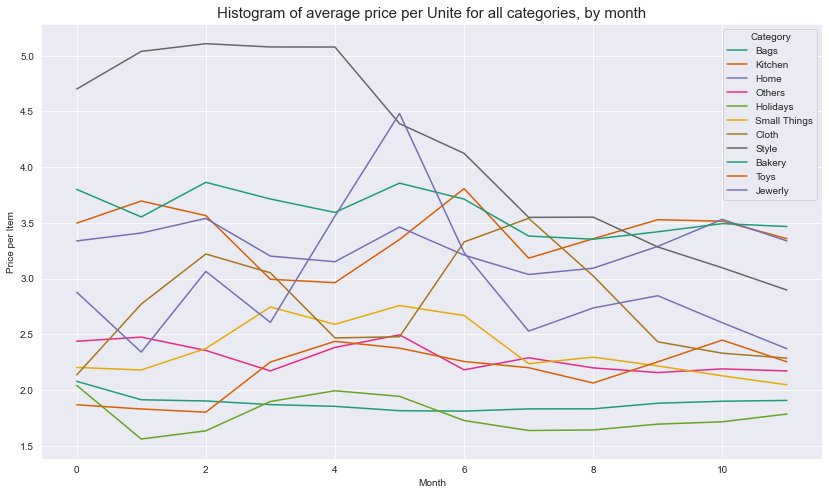

In [160]:
f, ax = plt.subplots(figsize = (14, 8))

plt.title('Histogram of average price per Unite for all categories, by month', fontdict={'size':15})
sns.lineplot(data = categ_prices, x='Month', y='UnitPrice', hue='Category', palette = 'Dark2')
plt.ylabel('Price per Item')
plt.xlabel('Month')


In [161]:
category_monthly_pivot = data.pivot_table(index='Category',
                                                  columns = 'Month_1',
                                                  values='UnitPrice',
                                                  aggfunc='mean',
                                                 margins = True)
category_monthly_pivot

Month_1       2018-12  2019-01  2019-02  2019-03  2019-04  2019-05  2019-06  \
Category                                                                      
Bags         2.079    1.913    1.902    1.870    1.854    1.815    1.811      
Bakery       3.801    3.554    3.864    3.715    3.594    3.857    3.713      
Cloth        2.136    2.772    3.221    3.052    2.468    2.478    3.329      
Holidays     2.042    1.561    1.635    1.898    1.994    1.944    1.727      
Home         3.338    3.409    3.540    3.202    3.152    3.463    3.211      
Jewerly      2.879    2.341    3.065    2.607    3.560    4.482    3.234      
Kitchen      3.498    3.697    3.566    2.994    2.964    3.351    3.808      
Others       2.438    2.475    2.356    2.172    2.383    2.496    2.182      
Small Things 2.203    2.180    2.373    2.745    2.590    2.759    2.669      
Style        4.701    5.039    5.108    5.079    5.078    4.391    4.124      
Toys         1.868    1.831    1.802    2.252    2.437    2.377    2.257      
All          3.026    3.047    3.107    2.948    2.939    3.054    2.962      

Month_1       2019-07  2019-08  2019-09  2019-10  2019-11   All  
Category                                                         
Bags         1.831    1.832    1.882    1.900    1.908    1.871  
Bakery       3.382    3.354    3.420    3.494    3.467    3.576  
Cloth        3.541    3.024    2.433    2.331    2.287    2.445  
Holidays     1.637    1.642    1.695    1.716    1.785    1.766  
Home         3.037    3.094    3.289    3.532    3.339    3.317  
Jewerly      2.529    2.737    2.847    2.605    2.371    2.870  
Kitchen      3.184    3.358    3.529    3.515    3.359    3.406  
Others       2.290    2.199    2.157    2.190    2.172    2.270  
Small Things 2.237    2.296    2.217    2.128    2.048    2.311  
Style        3.550    3.552    3.284    3.097    2.898    3.777  
Toys         2.201    2.064    2.253    2.449    2.254    2.209  
All          2.693    2.708    2.773    2.812    2.691    2.859

In [162]:
def z_test_mean_difference(data, category, winter_months, summer_months):
    """
    Performs a two-sample z-test to compare the mean difference between two groups.
    """
    # Select data for the categories
    data1 = data[(data["Category"] == category) & (data["Month_1"].isin(winter_months))]["UnitPrice"]
    data2 = data[(data["Category"] == category) & (data["Month_1"].isin(summer_months))]["UnitPrice"]
    
    # Compute sample means and standard deviations
    mean1 = data1.mean()
    mean2 = data2.mean()
    std1 = data1.std()
    std2 = data2.std()
    n1 = data1.shape[0]
    n2 = data2.shape[0]
    
    # Compute the standard error
    se = np.sqrt((std1**2 / n1) + (std2**2 / n2))
    
    # Compute the z-statistic
    z_value = (mean1 - mean2) / se
    
    # Compute the p-value
    distr = stats.norm(0, 1) 

    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    bonferroni_alpha = 0.05 / 8

    print('p-value: ', p_value)
    
    if (p_value < bonferroni_alpha):
        print('Reject H0 for', category, 'and months', summer_months, 'and', winter_months)
        print('-'*70)
    else:
        print('Fail to reject H0 for', category, 'category and months', summer_months, 'and', winter_months)
        print('-'*70)



In [163]:
desired_categ = ['Home', 'Kitchen', 'Holidays', 'Jewerly']

for i in desired_categ:
    winter_months=['2019-11']
    summer_months = ['2019-06']
    print(f'\033[1m For category {i} \033[0m ')
    z_test_mean_difference(data, i, winter_months, summer_months)

 For category Home  
p-value:  0.019218625619930485
Fail to reject H0 for Home category and months ['2019-06'] and ['2019-11']
----------------------------------------------------------------------
 For category Kitchen  
p-value:  0.05853685828806876
Fail to reject H0 for Kitchen category and months ['2019-06'] and ['2019-11']
----------------------------------------------------------------------
 For category Holidays  
p-value:  0.20084234773076126
Fail to reject H0 for Holidays category and months ['2019-06'] and ['2019-11']
----------------------------------------------------------------------
 For category Jewerly  
p-value:  1.5969187354691883e-06
Reject H0 for Jewerly and months ['2019-06'] and ['2019-11']
----------------------------------------------------------------------


**Conclusions**  

For the Home, Holidays and Kitchen categories, the p-value is not significant enough to reject the null hypothesis that the average price per unit in summer and winter months are equal. 
However, for the Jewerly category, the p-value is significant, meaning that we can reject the null hypothesis and conclude that there is a difference in average price per unit between the two periods.

## Main Conclusions

Based on our analysis of the online store data, we have taken several important steps to ensure the quality and reliability of the data. By filtering out lost, negative, and missing values, we reduced the likelihood of any problems with our analysis that could be caused by these values. In addition, by looking at the data for the entire year, quarter, and New Year's Eve, we were able to get a comprehensive view of the data and identify trends and patterns over different time periods.

We also classified the data into categories, types, and colors, which allowed us to better understand the data and understand how different products relate to each other. We studied the categories and examined the contribution of each to the Total Revenue.

RFM customers analysis has also been a valuable tool to help us understand our customers' behavior and how they interact with our online store so we can build a future marketing strategy.

Finally, the basket Apriori algorithm allowed us to identify products that are frequently purchased together, giving us a better understanding of the relationships between products and the types of products that our customers are likely to purchase.

In conclusion, our data analysis provided us with valuable insights about our online store and allowed us to make informed decisions based on data. Whether we want to improve our marketing strategies, product offerings, or customer experience, the data we analyze will be a valuable asset in our efforts.

## Tableau Vizualization

The dashboard that we have built into Tableau provides a dynamic and interactive way to explore the online store data. It is designed to be easily accessible and user-friendly, so that managers, employees, and other stakeholders can quickly and easily access the information they need.

https://public.tableau.com/app/profile/lana.dashevsky/viz/e-commerceproject_pres/SalesOverview

With this dashboard, users can quickly visualize key trends and patterns in the data, such as sales over time, popular products, and customer behavior. This information can be used to inform strategic decisions about product offerings, marketing, and customer experience, among other things.

In addition to visualizing the data, the dashboard also allows for more in-depth exploration and analysis. For example, users can drill down into specific product categories or customer segments to gain a more detailed understanding of their behavior. They can also compare different time periods or apply different filters to the data to understand the relationships between different variables.

## Recommendations

### Main recommends

Based on our observation of the online store data, we have identified several opportunities to increase sales.

1. First, we noticed that the store only operates 5 days a week, and is closed on Sundays and on New Year's Eve. To increase sales, **we could consider offering more flexible hours, such as extended hours on weekends or opening the store on Sundays. This would provide customers with more opportunities to shop, and could help to attract more business.**


2. Another opportunity to increase sales is to take advantage of the popularity of shopping at certain times. We noticed that the most popular times for shopping are 10, 12, and 15 hours. To take advantage of this, **we could offer promotions or discounts during these hours, or create special events or activities that encourage customers to shop at these times.**


3. In addition, we can also use data-driven marketing strategies to target customers who are most likely to make a purchase. For example, we could analyze customer purchase history and behavior to identify those who are most likely to be repeat customers, and create targeted promotions or special offers to encourage them to return.


4. Finally, it would also be a good idea to evaluate the overall customer experience, including the website design, checkout process, and shipping and returns policies, to ensure that they are as seamless and convenient as possible. Improving the customer experience can help to build customer loyalty and increase sales over the long-term.


5. In conclusion, there are several interesting observations and opportunities for increasing sales for our online store. By offering more flexible hours, taking advantage of popular shopping times, and using data-driven marketing strategies, we can help to attract more customers and boost sales.

### By product category

1. **Focus on high revenue-generating categories**: prioritize promoting and growing the `Home, Kitchen, and Style` categories, as they have the highest revenue.


2. **Monitor low-revenue generating categories**: monitor the `Jewelry and Cloth` categories, as they have the lowest revenue, to identify potential growth opportunities.


3. **Increase average revenue per item sold**: focus on increasing the average revenue per item sold in all categories, especially those with a low ratio of goods sold to revenue. This can be achieved by offering promotions, discounts, or upselling to customers.


4. **Promote high-selling categories**: focus on promoting categories with high numbers of items sold, such as the `Home` category.


5. **Monitor categories with low item sales**: monitor categories with low numbers of items sold, such as the `Cloth` category, to identify potential growth opportunities.


6. **Diversify product offerings**: consider diversifying its product offerings in categories with low revenue or low numbers of items sold, as this may attract new customers and increase overall revenue.


7. **Analyze customer behavior**: analyze customer behavior to understand which categories are most popular and why, and use this information to make informed decisions about product offerings and promotions.

### Marketing Strategy for Customers

Based on the data and RFM segmentation, there are a few recommendations that can be made:

1. Focus on retaining and growing the `"Champions"` and `"Loyal Customers"` segments. These customers have the highest average monetary value, purchase frequency, and customer count, making them the most valuable segments to the business. **Offer them exclusive promotions, personalized communication, and loyalty programs to encourage repeat purchases.**


2. Re-engage the `"Recent Customers"` segment. This segment has a relatively high frequency of purchases and customer count, making it a good target for re-engagement efforts. **Offer targeted promotions, personalized communication, and incentives to encourage repeat purchases.**


4. Nurture the `"Potential Loyalists"` segment. These customers have a relatively high average monetary value and customer count, making them a good target for building loyalty. **Offer targeted communication, personalized recommendations, and loyalty programs to encourage repeat purchases.**


5. Win back inactive customers in the `"Needs Attention"` and `"About To Sleep"` segments. **Offer targeted re-engagement campaigns, exclusive offers, and personalized communication to encourage these customers to make a purchase.**


6. Monitor the `"At Risk"` and `"Can't Lose Them"` segments. These segments have relatively high average monetary values, but low purchase frequencies. **Identify the root cause of their decreased activity and take action to retain these customers.**


7. Re-engage the `"Hibernating"` segment. These customers have a relatively low average monetary value and customer count, but can still be valuable to the business. **Offer targeted campaigns, incentives, and personalized communication to encourage these customers to make a purchase.**




### Basket Analysis

1. The difference in **buyer preferences highlights the importance of seasonal promotions and product offerings**. It's important for businesses to take into account the changing trends and adjust their product offerings accordingly.


2. To maximize sales, it's recommended to analyze the data from each month to determine the most popular products and create targeted promotions for those items. For example, **during the months where picnic baskets are popular, it would be beneficial to offer discounts or bundle deals on picnic accessories such as blankets, cooler bags, or even wine**.


3. In the months leading up to Christmas, the business can focus on promoting home decorations and Christmas trees, perhaps by offering a discount on multiple tree purchases or by showcasing a new line of holiday decorations.


4. **By staying in tune with the changing trends and adapting the product offerings and promotions accordingly, a business can increase its sales and keep its customers engaged and interested.**

## Presentation

https://www.canva.com/design/DAFZjMn9AVI/duqyNdXFEt_98eHECskozw/view?utm_content=DAFZjMn9AVI&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton



## References

**RFM segmentation**  

https://www.optimove.com/resources/learning-center/rfm-segmentation

https://www.moengage.com/blog/rfm-analysis-using-rfm-segments/


**Lemmatization in python**  

https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

**Apriori Algorithm and Basket analysis**

https://www.softwaretestinghelp.com/apriori-algorithm/

https://practicaldatascience.co.uk/data-science/how-to-use-the-apriori-algorithm-for-market-basket-analysis

**About Apriopi algorithm module in python**

https://github.com/rasbt/mlxtend/tree/master/mlxtend/frequent_patterns

**World Cloud Visualization**

https://www.datacamp.com/tutorial/wordcloud-python

https://www.geeksforgeeks.org/generating-word-cloud-python/

https://www.geeksforgeeks.org/generating-word-cloud-in-python-set-2/